In [ ]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install scikit_learn --q
!pip install scikit-optimize --q

!pip uninstall tensorflow
!pip install tensorflow==2.8.0

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.4 MB/s eta 0:00:00
Found existing installation: tensorflow 2.14.0
Uninstalling tensorflow-2.14.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.14.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.14.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 91.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [ ]:
realData = pd.read_csv('True.csv',engine='python', error_bad_lines=False)
realData

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
fakeData = pd.read_csv('Fake.csv',engine='python', error_bad_lines=False)
fakeData

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [ ]:
merged = pd.concat([realData, fakeData], axis=0, ignore_index=True)
merged

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [ ]:
# Add a class column with 0s for the first 21417 rows and 1s for the rest
merged['class_label'] = np.where(merged.index < 21417, 0, 1)
merged

,title,text,subject,date,class_label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [ ]:
merged.loc[21410:21430]

,title,text,subject,date,class_label
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",0
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",0
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0
21417,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
21418,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
21419,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1


In [ ]:
#check whether there are duplicated values
merged.duplicated().sum()

209

In [ ]:
# drop duplicated values from the dataset
merged.drop_duplicates(inplace = True)

In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44689 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        44689 non-null  object
 1   text         44689 non-null  object
 2   subject      44689 non-null  object
 3   date         44689 non-null  object
 4   class_label  44689 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


In [ ]:
# Check number of null values in each column
merged.isnull().sum()

title          0
text           0
subject        0
date           0
class_label    0
dtype: int64

In [ ]:
from datetime import datetime
from dateutil import parser

# dates in the format "December 31, 2017"
# Convert standard datetime format using a custom function
def parse_date(date_string):
    try:
        # Parse the date using dateutil's parser
        parsed_date = parser.parse(date_string)
        return parsed_date
    except:
        # Handle exceptions, return None for invalid dates
        return None
# Apply the custom function to the 'date_column'
merged['date'] = merged['date'].apply(parse_date)
merged

,title,text,subject,date,class_label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,0
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,2016-01-16,1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,2016-01-16,1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,2016-01-15,1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,2016-01-14,1


In [ ]:
# Check number of null values in each column
merged.isnull().sum()

title           0
text            0
subject         0
date           10
class_label     0
dtype: int64

In [ ]:
# Select rows with null values in the specified column
null_value_rows = merged[merged['date'].isnull()]
null_value_rows

,title,text,subject,date,class_label
30775,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,NaT,1
36924,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,NaT,1
36925,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,NaT,1
37256,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,NaT,1
37257,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,NaT,1
38849,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,NaT,1
38850,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,NaT,1
40350,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,NaT,1
43286,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,NaT,1
43287,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,NaT,1


In [ ]:
null_indices = merged[merged.isnull().any(axis=1)].index #take indices of the records with null values in date
new_df = pd.concat([realData, fakeData], axis=0, ignore_index=True)
new_df = new_df.loc[null_indices]
new_df

,title,text,subject,date
30775,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...
36924,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...
36925,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...
37256,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...
37257,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...
38849,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...
38850,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...
40350,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...
43286,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...
43287,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...


In [ ]:
# Drop rows with null values in column 'date'
merged.dropna(subset=['date'], inplace=True)
merged

,title,text,subject,date,class_label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,0
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,2016-01-16,1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,2016-01-16,1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,2016-01-15,1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,2016-01-14,1


In [ ]:
# Check number of null values in each column
merged.isnull().sum()

title          0
text           0
subject        0
date           0
class_label    0
dtype: int64

In [ ]:
# Separate x_train, y_train,x_test and y_test after separating features and labels
merged_df_features = merged.drop(['class_label'], axis = 1) # Dropping target label from features set
merged_df_labels = merged['class_label'] # Target label
merged_df_features

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29
...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,2016-01-16
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,2016-01-16
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,2016-01-15
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,2016-01-14


In [ ]:
merged_df_labels = pd.DataFrame(merged_df_labels)
merged_df_labels

,class_label
0,0
1,0
2,0
3,0
4,0
...,...
44893,1
44894,1
44895,1
44896,1


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(merged_df_features,merged_df_labels, test_size=0.2, stratify = merged_df_labels, random_state = 0)
# Stratify and shuffling not recommended for time-series data
print("y_train:\n", y_train.value_counts())
print("y_test:\n", y_test.value_counts())
x_train

y_train:
 class_label
1              18774
0              16969
dtype: int64
y_test:
 class_label
1              4694
0              4242
dtype: int64


,title,text,subject,date
6358,U.S. farmers ask Trump to stay the course on Cuba,HAVANA (Reuters) - Dozens of U.S. farm and agr...,politicsNews,2017-01-12
30503,COORDINATED? Yet Another Hack Reporter Claims ...,A coordinated effort to spew anti-Trump propag...,politics,2017-12-31
26986,MUST WATCH: This Trump Video May Prove He’s F...,Donald Trump s antics at a campaign rally on W...,News,2016-07-06
3254,Supreme Court invalidates gender inequality in...,WASHINGTON (Reuters) - The U.S. Supreme Court ...,politicsNews,2017-06-12
24119,WATCH: Fox News Literally Praises Last Jobs R...,Fox News insulted President Obama one last tim...,News,2017-02-03
...,...,...,...,...
22334,"Republican Senator Chokes, Mocks Trump In Bru...","On Wednesday, Senator Pat Toomey (R-PA) gave a...",News,2017-07-06
35911,PREGNANT CHELSEA CLINTON Makes Disturbing Conf...,The apple doesn t fall far from the tree Chels...,politics,2016-02-12
11263,South Korea president says China response to N...,SEOUL (Reuters) - China should play a key and ...,politicsNews,2016-01-13
5194,"Canada, U.S. join forces on tackling border as...",OTTAWA (Reuters) - Canadian and U.S. officials...,politicsNews,2017-03-01


In [ ]:
y_train

,class_label
6358,0
30503,1
26986,1
3254,0
24119,1
...,...
22334,1
35911,1
11263,0
5194,0


In [ ]:
x_test

,title,text,subject,date
33674,CNN HOST Suggests Women Wear Muslim Headscarf ...,,politics,2016-11-30
6806,Trump picks opponent of higher minimum wage fo...,WASHINGTON (Reuters) - President-elect Donald ...,politicsNews,2016-12-08
8941,Top U.S. Senate Democrat says he will support ...,WASHINGTON (Reuters) - Senate Democratic leade...,politicsNews,2016-06-28
44307,THE JACK BLOOD SHOW: ‘From May Day Riots to Gl...,21st Century Wire says .From May Day riots to ...,Middle-east,2017-05-22
40479,HEARTLESS DEMOCRATS Invite Illegals To Taunt T...,Jessica Davis (right) and Susan Oliver (left) ...,left-news,2017-02-28
...,...,...,...,...
28622,Trump Threatens To File Battery Charges On Re...,Donald Trump spent Wednesday morning trying to...,News,2016-03-30
41882,SHERIFF CLARKE OUTRAGED AT RALLY VIOLENCE: ” W...,Sheriff Clarke weighs in on the violence at th...,left-news,2016-06-07
13357,Zimbabwe court postpones former finmin Chombo ...,HARARE (Reuters) - A Zimbabwean court has post...,worldnews,2017-12-01
30983,ONE OF The WORST TEAMS In The NFL Will Donate ...,The San Francisco 49ers weighed in on the nati...,politics,2017-10-29


In [ ]:
y_test

,class_label
33674,1
6806,0
8941,0
44307,1
40479,1
...,...
28622,1
41882,1
13357,0
30983,1


In [ ]:
train_df = pd.concat([x_train, y_train], axis=1, join='inner')
train_df

,title,text,subject,date,class_label
6358,U.S. farmers ask Trump to stay the course on Cuba,HAVANA (Reuters) - Dozens of U.S. farm and agr...,politicsNews,2017-01-12,0
30503,COORDINATED? Yet Another Hack Reporter Claims ...,A coordinated effort to spew anti-Trump propag...,politics,2017-12-31,1
26986,MUST WATCH: This Trump Video May Prove He’s F...,Donald Trump s antics at a campaign rally on W...,News,2016-07-06,1
3254,Supreme Court invalidates gender inequality in...,WASHINGTON (Reuters) - The U.S. Supreme Court ...,politicsNews,2017-06-12,0
24119,WATCH: Fox News Literally Praises Last Jobs R...,Fox News insulted President Obama one last tim...,News,2017-02-03,1
...,...,...,...,...,...
22334,"Republican Senator Chokes, Mocks Trump In Bru...","On Wednesday, Senator Pat Toomey (R-PA) gave a...",News,2017-07-06,1
35911,PREGNANT CHELSEA CLINTON Makes Disturbing Conf...,The apple doesn t fall far from the tree Chels...,politics,2016-02-12,1
11263,South Korea president says China response to N...,SEOUL (Reuters) - China should play a key and ...,politicsNews,2016-01-13,0
5194,"Canada, U.S. join forces on tackling border as...",OTTAWA (Reuters) - Canadian and U.S. officials...,politicsNews,2017-03-01,0


In [ ]:
# Sort values by date in train and test
train_df = train_df.sort_values(by='date', ascending=True)
test_df = pd.concat([x_test, y_test], axis=1, join='inner')
test_df

,title,text,subject,date,class_label
33674,CNN HOST Suggests Women Wear Muslim Headscarf ...,,politics,2016-11-30,1
6806,Trump picks opponent of higher minimum wage fo...,WASHINGTON (Reuters) - President-elect Donald ...,politicsNews,2016-12-08,0
8941,Top U.S. Senate Democrat says he will support ...,WASHINGTON (Reuters) - Senate Democratic leade...,politicsNews,2016-06-28,0
44307,THE JACK BLOOD SHOW: ‘From May Day Riots to Gl...,21st Century Wire says .From May Day riots to ...,Middle-east,2017-05-22,1
40479,HEARTLESS DEMOCRATS Invite Illegals To Taunt T...,Jessica Davis (right) and Susan Oliver (left) ...,left-news,2017-02-28,1
...,...,...,...,...,...
28622,Trump Threatens To File Battery Charges On Re...,Donald Trump spent Wednesday morning trying to...,News,2016-03-30,1
41882,SHERIFF CLARKE OUTRAGED AT RALLY VIOLENCE: ” W...,Sheriff Clarke weighs in on the violence at th...,left-news,2016-06-07,1
13357,Zimbabwe court postpones former finmin Chombo ...,HARARE (Reuters) - A Zimbabwean court has post...,worldnews,2017-12-01,0
30983,ONE OF The WORST TEAMS In The NFL Will Donate ...,The San Francisco 49ers weighed in on the nati...,politics,2017-10-29,1


In [ ]:
test_df = test_df.sort_values(by='date', ascending=True)
x_test = test_df.drop(['class_label'], axis = 1) # Dropping target label from features set
y_test = test_df['class_label'] # Target label

In [ ]:
x_test

,title,text,subject,date
37301,MUSLIM WOMAN ARRESTED FOR SPITTING ON HER FELL...,This woman s having trouble entering the Walma...,politics,2015-04-01
37298,FED’S PREVENT ‘Mother of the Year’ From Boardi...,There are just way too many wannabe male and f...,politics,2015-04-04
43333,[VIDEO] 16 YR OLD ARRESTED For Violent Gang Be...,This is a sad commentary on a generation who h...,left-news,2015-04-04
37296,LISTEN TO THIS FORMER DOJ WHISTLEBLOWER,THE CONGRESS IS THERE TO DO WHAT S BEST FOR TH...,politics,2015-04-05
37287,(VIDEO) UN CLIMATE CHANGE FREAKS: “We should m...,What an evil bunch of freaks! The agenda is so...,politics,2015-04-06
...,...,...,...,...
30505,WATCH: SENATOR LINDSEY GRAHAM DROPS BOMBSHELL…...,Everyone suspected the sketchy Steele Dossier ...,politics,2017-12-31
30501,JUST IN: CROOKED DOJ OFFICIAL Didn’t Reveal Th...,We ve been covering the curious case of DOJ of...,politics,2018-02-14
30493,TWO HIGH SCHOOL JROTC Members Tell INCREDIBLE ...,ABC News When two Marjory Stoneman Douglas Hi...,politics,2018-02-15
30489,WATCH: Mitt Romney Announces Run for Senate…Ba...,Just what we need another Trump-bashing RINO. ...,politics,2018-02-16


In [ ]:
y_test = pd.DataFrame(y_test)
y_test

,class_label
37301,1
37298,1
43333,1
37296,1
37287,1
...,...
30505,1
30501,1
30493,1
30489,1


In [ ]:
# Value counts
print(y_train.class_label.value_counts())
print(y_test.class_label.value_counts())

1    18774
0    16969
Name: class_label, dtype: int64
1    4694
0    4242
Name: class_label, dtype: int64


In [ ]:
# Data shape
print(train_df.shape)
print(x_test.shape)

(35743, 5)
(8936, 4)


In [ ]:
print(train_df['subject'].unique())
print(train_df['subject'].nunique())

['politics' 'left-news' 'Government News' 'News' 'US_News' 'Middle-east'
 'politicsNews' 'worldnews']
8


In [ ]:
from sklearn.preprocessing import LabelEncoder

column_name = 'subject'

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the specified column
train_df[column_name + '_encoded'] = label_encoder.fit_transform(train_df[column_name])
x_test[column_name + '_encoded'] = label_encoder.fit_transform(x_test[column_name])

# Drop the original categorical columns
train_df = train_df.drop(columns='subject')
train_df = pd.DataFrame(train_df)

x_test = x_test.drop(columns='subject')
x_test = pd.DataFrame(x_test)
train_df

,title,text,date,class_label,subject_encoded
37303,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,2015-03-31,1,5
37306,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,2015-03-31,1,5
43336,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,1,4
37302,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,2015-03-31,1,5
43335,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,1,4
...,...,...,...,...,...
30472,WATCH: ’’Carpetbagger” Mitt Romney Takes Swipe...,The GOP presidential candidate who couldn t se...,2018-02-18,1,5
30474,HIGH SCHOOL TEACHER Makes “Shooting At Trump” ...,EAG News A Wyoming high school is under fire ...,2018-02-18,1,5
30467,Democrat Senator Warns Mueller Not To Release ...,"According to The Hill, Democrat Senator Bob Ca...",2018-02-19,1,5
30469,WATCH: SNOWFLAKES ASKED Communist Party Platfo...,Ami Horowitz is fantastic! Check out this man ...,2018-02-19,1,5


In [ ]:
x_test['subject_encoded'].unique()

array([5, 4, 0, 2, 3, 6, 1, 7])

Adding columns

In [ ]:
# Extract day of the week, date, month, and year into new columns
train_df['day_of_week'] = train_df['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
train_df['day'] = train_df['date'].dt.day
train_df['month'] = train_df['date'].dt.month
train_df['year'] = train_df['date'].dt.year

x_test['day_of_week'] = x_test['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
x_test['day'] = x_test['date'].dt.day
x_test['month'] = x_test['date'].dt.month
x_test['year'] = x_test['date'].dt.year

train_df

,title,text,date,class_label,subject_encoded,day_of_week,day,month,year
37303,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,2015-03-31,1,5,1,31,3,2015
37306,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,2015-03-31,1,5,1,31,3,2015
43336,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,1,4,1,31,3,2015
37302,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,2015-03-31,1,5,1,31,3,2015
43335,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,1,4,1,31,3,2015
...,...,...,...,...,...,...,...,...,...
30472,WATCH: ’’Carpetbagger” Mitt Romney Takes Swipe...,The GOP presidential candidate who couldn t se...,2018-02-18,1,5,6,18,2,2018
30474,HIGH SCHOOL TEACHER Makes “Shooting At Trump” ...,EAG News A Wyoming high school is under fire ...,2018-02-18,1,5,6,18,2,2018
30467,Democrat Senator Warns Mueller Not To Release ...,"According to The Hill, Democrat Senator Bob Ca...",2018-02-19,1,5,0,19,2,2018
30469,WATCH: SNOWFLAKES ASKED Communist Party Platfo...,Ami Horowitz is fantastic! Check out this man ...,2018-02-19,1,5,0,19,2,2018


In [ ]:
# Create a new column 'word_count' containing the word count of each text
train_df['title_word_count'] = train_df['title'].apply(lambda x: len(str(x).split()))
train_df['text_word_count'] = train_df['text'].apply(lambda x: len(str(x).split()))

x_test['title_word_count'] = x_test['title'].apply(lambda x: len(str(x).split()))
x_test['text_word_count'] = x_test['text'].apply(lambda x: len(str(x).split()))
train_df

,title,text,date,class_label,subject_encoded,day_of_week,day,month,year,title_word_count,text_word_count
37303,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,2015-03-31,1,5,1,31,3,2015,21,210
37306,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,2015-03-31,1,5,1,31,3,2015,20,493
43336,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,1,4,1,31,3,2015,12,322
37302,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,2015-03-31,1,5,1,31,3,2015,9,1155
43335,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,1,4,1,31,3,2015,15,123
...,...,...,...,...,...,...,...,...,...,...,...
30472,WATCH: ’’Carpetbagger” Mitt Romney Takes Swipe...,The GOP presidential candidate who couldn t se...,2018-02-18,1,5,6,18,2,2018,15,230
30474,HIGH SCHOOL TEACHER Makes “Shooting At Trump” ...,EAG News A Wyoming high school is under fire ...,2018-02-18,1,5,6,18,2,2018,14,619
30467,Democrat Senator Warns Mueller Not To Release ...,"According to The Hill, Democrat Senator Bob Ca...",2018-02-19,1,5,0,19,2,2018,13,181
30469,WATCH: SNOWFLAKES ASKED Communist Party Platfo...,Ami Horowitz is fantastic! Check out this man ...,2018-02-19,1,5,0,19,2,2018,11,137


In [ ]:
from textblob import TextBlob

# Function to calculate sentiment score using TextBlob
def calculate_sentiment(text):
    analysis = TextBlob(text)
    # Return the polarity score (ranges from -1 to 1, where negative values indicate negative sentiment)
    return analysis.sentiment.polarity

# Create a new column 'sentiment_score' containing the sentiment score of each text
train_df['sentiment_score_title'] = train_df['title'].apply(calculate_sentiment)
train_df['sentiment_score_text'] = train_df['text'].apply(calculate_sentiment)
x_test['sentiment_score_title'] = x_test['title'].apply(calculate_sentiment)
x_test['sentiment_score_text'] = x_test['text'].apply(calculate_sentiment)

# Print the updated DataFrame with sentiment scores
train_df

,title,text,date,class_label,subject_encoded,day_of_week,day,month,year,title_word_count,text_word_count,sentiment_score_title,sentiment_score_text
37303,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,2015-03-31,1,5,1,31,3,2015,21,210,-0.30,-0.038030
37306,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,2015-03-31,1,5,1,31,3,2015,20,493,0.25,0.102236
43336,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,1,4,1,31,3,2015,12,322,0.50,0.200397
37302,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,2015-03-31,1,5,1,31,3,2015,9,1155,0.00,-0.116312
43335,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,1,4,1,31,3,2015,15,123,0.10,0.214286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30472,WATCH: ’’Carpetbagger” Mitt Romney Takes Swipe...,The GOP presidential candidate who couldn t se...,2018-02-18,1,5,6,18,2,2018,15,230,0.25,0.251259
30474,HIGH SCHOOL TEACHER Makes “Shooting At Trump” ...,EAG News A Wyoming high school is under fire ...,2018-02-18,1,5,6,18,2,2018,14,619,0.08,0.068677
30467,Democrat Senator Warns Mueller Not To Release ...,"According to The Hill, Democrat Senator Bob Ca...",2018-02-19,1,5,0,19,2,2018,13,181,0.00,0.154604
30469,WATCH: SNOWFLAKES ASKED Communist Party Platfo...,Ami Horowitz is fantastic! Check out this man ...,2018-02-19,1,5,0,19,2,2018,11,137,0.00,0.171429


In [ ]:
# Out of different score combining strategies like Weighted average, product, difference, product, threshold values and sum, sum has been chosen
# for combining both 'sentiment_score_title' and 'sentiment_score_text', as it is the simplest and gives more insight while giving equal importance to both the columns,
# when compared to product or difference, where the result could be far off from the individual column values.

# Add a new column 'sentiment_scores_sum' which is the sum of 'sentiment_score_title' and 'sentiment_score_text'
train_df['sentiment_scores_sum'] = train_df['sentiment_score_title'] + train_df['sentiment_score_text']
x_test['sentiment_scores_sum'] = x_test['sentiment_score_title'] + x_test['sentiment_score_text']
train_df

,title,text,date,class_label,subject_encoded,day_of_week,day,month,year,title_word_count,text_word_count,sentiment_score_title,sentiment_score_text,sentiment_scores_sum
37303,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,2015-03-31,1,5,1,31,3,2015,21,210,-0.30,-0.038030,-0.338030
37306,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,2015-03-31,1,5,1,31,3,2015,20,493,0.25,0.102236,0.352236
43336,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,1,4,1,31,3,2015,12,322,0.50,0.200397,0.700397
37302,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,2015-03-31,1,5,1,31,3,2015,9,1155,0.00,-0.116312,-0.116312
43335,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,1,4,1,31,3,2015,15,123,0.10,0.214286,0.314286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30472,WATCH: ’’Carpetbagger” Mitt Romney Takes Swipe...,The GOP presidential candidate who couldn t se...,2018-02-18,1,5,6,18,2,2018,15,230,0.25,0.251259,0.501259
30474,HIGH SCHOOL TEACHER Makes “Shooting At Trump” ...,EAG News A Wyoming high school is under fire ...,2018-02-18,1,5,6,18,2,2018,14,619,0.08,0.068677,0.148677
30467,Democrat Senator Warns Mueller Not To Release ...,"According to The Hill, Democrat Senator Bob Ca...",2018-02-19,1,5,0,19,2,2018,13,181,0.00,0.154604,0.154604
30469,WATCH: SNOWFLAKES ASKED Communist Party Platfo...,Ami Horowitz is fantastic! Check out this man ...,2018-02-19,1,5,0,19,2,2018,11,137,0.00,0.171429,0.171429


In [ ]:
print(train_df.class_label.value_counts())
print(train_df.shape)
print(train_df.info())

for column in train_df.columns:
    print(f"Column: {column}")
    print(f"Data Type: {train_df[column].dtypes}")
    print(f"Unique Values: {train_df[column].unique()}")
    print(f"Number of Unique Values: {len(train_df[column].unique())}")
    print("\n" + "="*30 + "\n")

1    18774
0    16969
Name: class_label, dtype: int64
(35743, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 35743 entries, 37303 to 30468
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  35743 non-null  object        
 1   text                   35743 non-null  object        
 2   date                   35743 non-null  datetime64[ns]
 3   class_label            35743 non-null  int64         
 4   subject_encoded        35743 non-null  int64         
 5   day_of_week            35743 non-null  int64         
 6   day                    35743 non-null  int64         
 7   month                  35743 non-null  int64         
 8   year                   35743 non-null  int64         
 9   title_word_count       35743 non-null  int64         
 10  text_word_count        35743 non-null  int64         
 11  sentiment_score_title  35743 non-null  float64   

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

def add_trend_seasonality_residual(df, trend_strength=0.03, seasonality_strength=0.1):
    df['trend'] = np.arange(len(df)) * trend_strength
    df['seasonality'] = np.sin(2 * np.pi * df['date'].dt.dayofyear / 365)
    df['residual'] = np.random.normal(scale=seasonality_strength, size=len(df))
    return df

def evaluate_model(df, trend_strength, seasonality_strength):
    df_copy = df.copy()
    df_copy['modeled'] = df_copy['trend'] + df_copy['seasonality'] + df_copy['residual']
    mse = mean_squared_error(df_copy['class_label'], df_copy['modeled'])
    rmse = np.sqrt(mse)
    return rmse

# Assuming train_df is already available with 'date' and 'class_label' columns
# No need for a placeholder 'class_label' column

# Perform Grid Search
best_rmse = float('inf')
best_trend_strength = None
best_seasonality_strength = None

for trend_strength in [0.01, 0.02, 0.03, 0.04, 0.05]:
    for seasonality_strength in [0.1, 0.15, 0.2, 0.25, 0.3]:
        # Add features directly to the original train_df
        add_trend_seasonality_residual(train_df, trend_strength, seasonality_strength)
        rmse = evaluate_model(train_df, trend_strength, seasonality_strength)

        if rmse < best_rmse:
            best_rmse = rmse
            best_trend_strength = trend_strength
            best_seasonality_strength = seasonality_strength

print(f'Best Trend Strength: {best_trend_strength}')
print(f'Best Seasonality Strength: {best_seasonality_strength}')
print(f'Best RMSE: {best_rmse}')

train_df

Best Trend Strength: 0.01
Best Seasonality Strength: 0.3
Best RMSE: 205.73922997198383


,title,text,date,class_label,subject_encoded,day_of_week,day,month,year,title_word_count,text_word_count,sentiment_score_title,sentiment_score_text,sentiment_scores_sum,trend,seasonality,residual
37303,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,2015-03-31,1,5,1,31,3,2015,21,210,-0.30,-0.038030,-0.338030,0.00,0.999769,-0.039128
37306,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,2015-03-31,1,5,1,31,3,2015,20,493,0.25,0.102236,0.352236,0.05,0.999769,-0.023423
43336,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,1,4,1,31,3,2015,12,322,0.50,0.200397,0.700397,0.10,0.999769,0.368758
37302,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,2015-03-31,1,5,1,31,3,2015,9,1155,0.00,-0.116312,-0.116312,0.15,0.999769,-0.475736
43335,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,1,4,1,31,3,2015,15,123,0.10,0.214286,0.314286,0.20,0.999769,-0.112079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30472,WATCH: ’’Carpetbagger” Mitt Romney Takes Swipe...,The GOP presidential candidate who couldn t se...,2018-02-18,1,5,6,18,2,2018,15,230,0.25,0.251259,0.501259,1786.90,0.746972,-0.456792
30474,HIGH SCHOOL TEACHER Makes “Shooting At Trump” ...,EAG News A Wyoming high school is under fire ...,2018-02-18,1,5,6,18,2,2018,14,619,0.08,0.068677,0.148677,1786.95,0.746972,0.247931
30467,Democrat Senator Warns Mueller Not To Release ...,"According to The Hill, Democrat Senator Bob Ca...",2018-02-19,1,5,0,19,2,2018,13,181,0.00,0.154604,0.154604,1787.00,0.758306,-0.622762
30469,WATCH: SNOWFLAKES ASKED Communist Party Platfo...,Ami Horowitz is fantastic! Check out this man ...,2018-02-19,1,5,0,19,2,2018,11,137,0.00,0.171429,0.171429,1787.05,0.758306,-0.294652


In [ ]:
x_test['trend'] = np.arange(len(x_test)) * best_trend_strength
x_test['seasonality'] = np.sin(2 * np.pi * x_test['date'].dt.dayofyear / 365)

# Assuming df is your training set with 'residual' column
residual_mean = train_df['residual'].mean()
residual_std = train_df['residual'].std()

# Generate Random Residuals for the Test Set
num_test_samples = len(x_test)
x_test['residual'] = np.random.normal(loc=residual_mean, scale=residual_std, size=num_test_samples)

x_test

,title,text,date,subject_encoded,day_of_week,day,month,year,title_word_count,text_word_count,sentiment_score_title,sentiment_score_text,sentiment_scores_sum,trend,seasonality,residual
37301,MUSLIM WOMAN ARRESTED FOR SPITTING ON HER FELL...,This woman s having trouble entering the Walma...,2015-04-01,5,2,1,4,2015,18,345,0.166667,-0.062500,0.104167,0.00,9.999907e-01,0.273724
37298,FED’S PREVENT ‘Mother of the Year’ From Boardi...,There are just way too many wannabe male and f...,2015-04-04,5,5,4,4,2015,20,247,-0.400000,0.084240,-0.315760,0.01,9.988797e-01,0.111456
43333,[VIDEO] 16 YR OLD ARRESTED For Violent Gang Be...,This is a sad commentary on a generation who h...,2015-04-04,4,5,4,4,2015,19,468,-0.107727,-0.025574,-0.133302,0.02,9.988797e-01,0.140450
37296,LISTEN TO THIS FORMER DOJ WHISTLEBLOWER,THE CONGRESS IS THERE TO DO WHAT S BEST FOR TH...,2015-04-05,5,6,5,4,2015,6,42,0.000000,0.333333,0.333333,0.03,9.979172e-01,-0.130576
37287,(VIDEO) UN CLIMATE CHANGE FREAKS: “We should m...,What an evil bunch of freaks! The agenda is so...,2015-04-06,5,0,6,4,2015,15,386,0.000000,-0.022965,-0.022965,0.04,9.966589e-01,-0.166576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30505,WATCH: SENATOR LINDSEY GRAHAM DROPS BOMBSHELL…...,Everyone suspected the sketchy Steele Dossier ...,2017-12-31,5,6,31,12,2017,22,1530,-0.166667,0.014363,-0.152304,89.31,6.432491e-16,0.551967
30501,JUST IN: CROOKED DOJ OFFICIAL Didn’t Reveal Th...,We ve been covering the curious case of DOJ of...,2018-02-14,5,2,14,2,2018,22,608,0.000000,0.030781,0.030781,89.32,6.994583e-01,-0.052324
30493,TWO HIGH SCHOOL JROTC Members Tell INCREDIBLE ...,ABC News When two Marjory Stoneman Douglas Hi...,2018-02-15,5,3,15,2,2018,24,332,0.530000,0.045937,0.575937,89.33,7.116566e-01,0.452953
30489,WATCH: Mitt Romney Announces Run for Senate…Ba...,Just what we need another Trump-bashing RINO. ...,2018-02-16,5,4,16,2,2018,13,145,0.000000,0.218182,0.218182,89.34,7.236440e-01,-0.348325


## Visualization

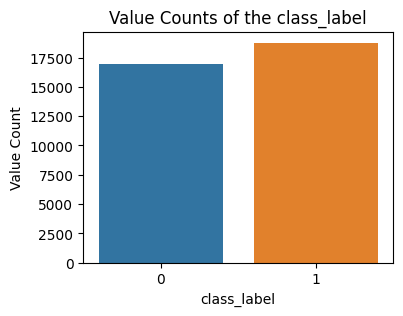

   class_label  Value Count
0            1        18774
1            0        16969


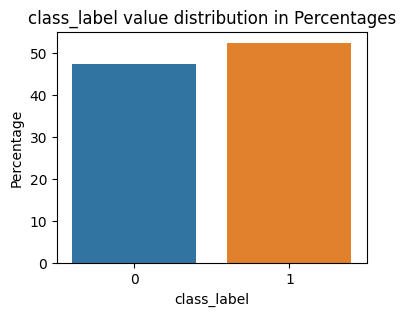

   class_label  counts  Percentage
0            1   18774    52.52497
1            0   16969    47.47503


In [ ]:
# Display value counts for class
feature = "class_label"

# Get value counts for each unique value present in the attack column
feature_value_counts = train_df[feature].value_counts()

#Convert the series into Dataframe object
feature_value_counts = pd.DataFrame({feature:feature_value_counts.index,
                                     'Value Count':feature_value_counts.values})

# Plot the value counts
plt.figure(figsize = (4,3))
s = sns.barplot(x = feature, y="Value Count",data=feature_value_counts)
s.set_xticklabels(s.get_xticklabels())
s.set_title("Value Counts of the "+feature)
plt.show()
print(feature_value_counts)

# Get value counts for each unique value present in the attack column
feature_percentages = train_df[feature].value_counts().reset_index(name ="counts")

# Replace index name with attack
feature_percentages.rename(columns = {'index':feature}, inplace = True)

# Compute the percentage value
feature_percentages["Percentage"] = feature_percentages["counts"].apply(
    lambda x:round(x*100/feature_percentages["counts"].sum(),5))

# Plot the percentage values
plt.figure(figsize = (4,3))
s = sns.barplot(x = feature, y="Percentage",data=feature_percentages)
s.set_title(feature+" value distribution in Percentages")
s.set_xticklabels(s.get_xticklabels())
plt.show()
print(feature_percentages)

<Axes: >

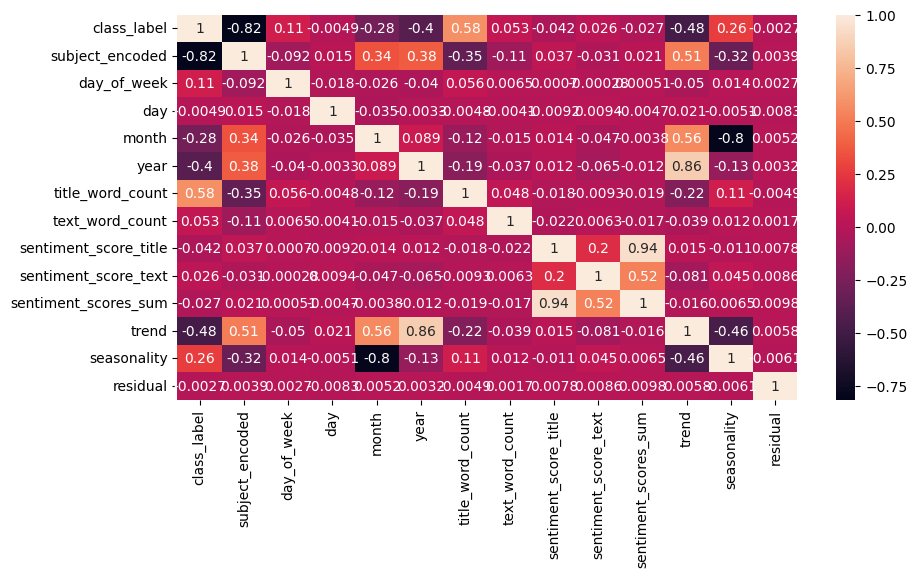

In [ ]:
# Plot the feature correlations
plt.figure(figsize = (10,5))
sns.heatmap(train_df.corr(), annot = True)

In [ ]:
# Identify the strongest feature correlations
corr = train_df.corr()
corr_class_label = corr.reindex(corr["class_label"].abs().sort_values(ascending=False).index)
corr_class_label = corr_class_label["class_label"]
corr_class_label = pd.DataFrame (corr_class_label)
corr_class_label=(corr_class_label.style.background_gradient(cmap ='Blues'))
corr_class_label

,class_label
class_label,1.000000
subject_encoded,-0.815367
title_word_count,0.581276
trend,-0.482667
year,-0.401968
month,-0.278830
seasonality,0.262750
day_of_week,0.114088
text_word_count,0.053190
sentiment_score_title,-0.041798


In [ ]:
# Visualization
# Function to analyze the numerical features in the dataset
def plot_numerical_features(feature,data=train_df):
  print("Data Analysis of feature: {}".format(feature))
  # Histogram
  plt.figure(figsize=(3,3))
  plt.hist(train_df[feature], bins=25)
  plt.ylabel("Frequency")
  plt.title("Histogram plot for {}".format(feature))
  plt.show()

  #Plot value counts of all the records present in the data
  plt.figure(figsize=(3,3))
  s = sns.FacetGrid(data, hue="class_label").map(sns.distplot, feature).add_legend();
  s.fig.suptitle("Univariate analysis of the feature {}".format(feature))
  plt.show()
  print("Box Plots to analyze the {} distribution".format(feature))

  # Plot the box plot for the data distribution of the feature
  plt.figure(figsize=(3,3))
  s = sns.boxplot(x='class_label',y=feature, data=data)
  s.set_title("Box Plot for the feature "+feature)
  plt.show()

  # Print the min, max, 25th, 50th , 75th etc., statistical value for all the records
  print(data[feature].describe())
  print("="*100)

Analysis of subject_encoded
Data Analysis of feature: subject_encoded


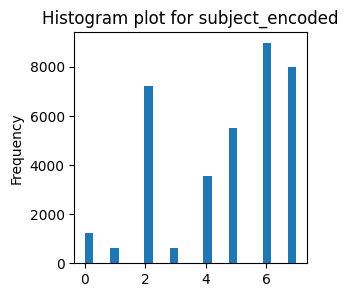

<Figure size 300x300 with 0 Axes>

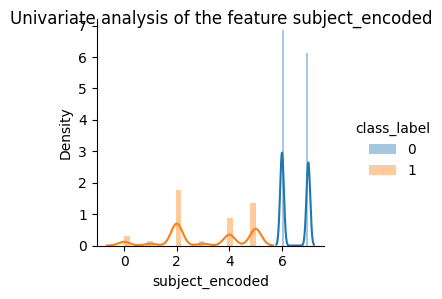

Box Plots to analyze the subject_encoded distribution


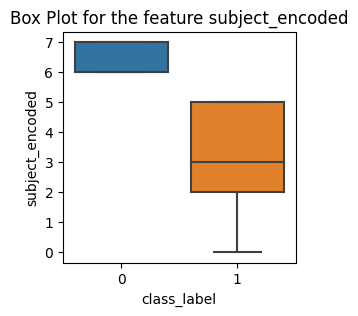

count    35743.000000
mean         4.714546
std          2.049050
min          0.000000
25%          2.000000
50%          5.000000
75%          6.000000
max          7.000000
Name: subject_encoded, dtype: float64
Analysis of title_word_count
Data Analysis of feature: title_word_count


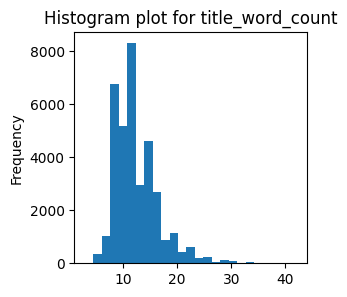

<Figure size 300x300 with 0 Axes>

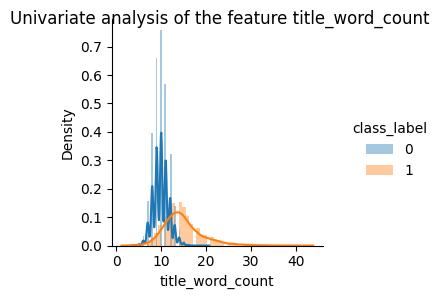

Box Plots to analyze the title_word_count distribution


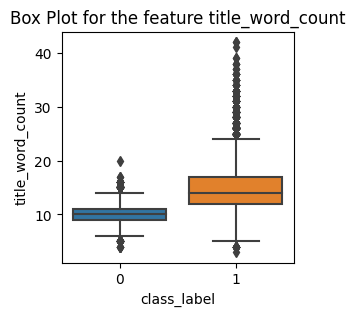

count    35743.000000
mean        12.474415
std          4.123745
min          3.000000
25%         10.000000
50%         11.000000
75%         14.000000
max         42.000000
Name: title_word_count, dtype: float64
Analysis of day
Data Analysis of feature: day


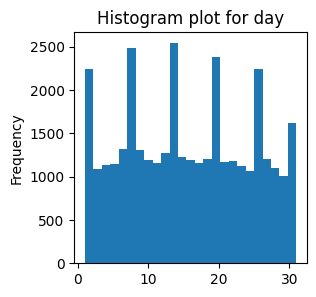

<Figure size 300x300 with 0 Axes>

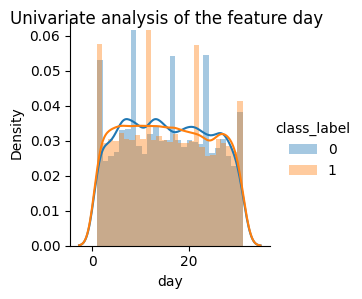

Box Plots to analyze the day distribution


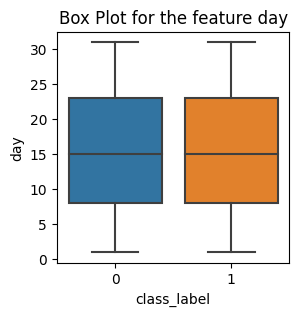

count    35743.000000
mean        15.534874
std          8.664050
min          1.000000
25%          8.000000
50%         15.000000
75%         23.000000
max         31.000000
Name: day, dtype: float64
Analysis of trend
Data Analysis of feature: trend


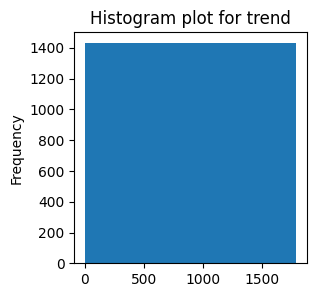

<Figure size 300x300 with 0 Axes>

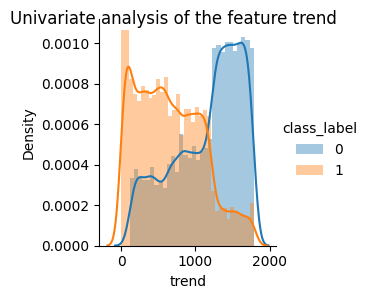

Box Plots to analyze the trend distribution


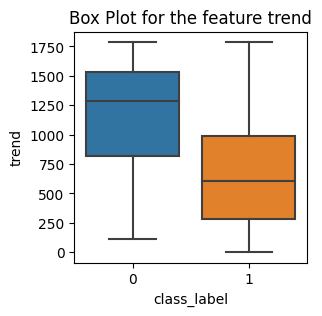

count    35743.000000
mean       893.550000
std        515.912984
min          0.000000
25%        446.775000
50%        893.550000
75%       1340.325000
max       1787.100000
Name: trend, dtype: float64
Analysis of residual
Data Analysis of feature: residual


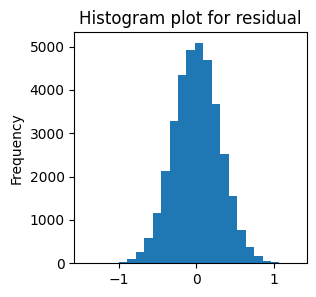

<Figure size 300x300 with 0 Axes>

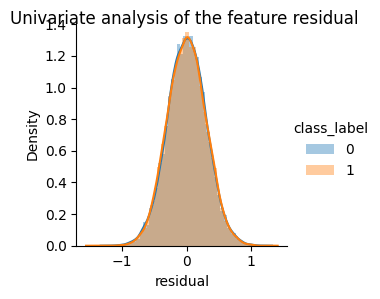

Box Plots to analyze the residual distribution


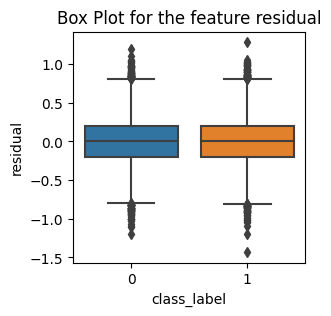

count    35743.000000
mean         0.002281
std          0.297392
min         -1.431346
25%         -0.200927
50%          0.003199
75%          0.202616
max          1.282892
Name: residual, dtype: float64
Analysis of seasonality
Data Analysis of feature: seasonality


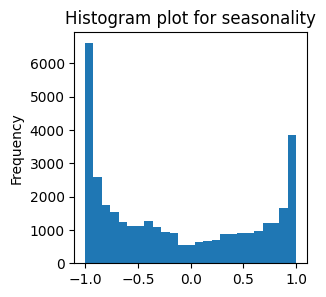

<Figure size 300x300 with 0 Axes>

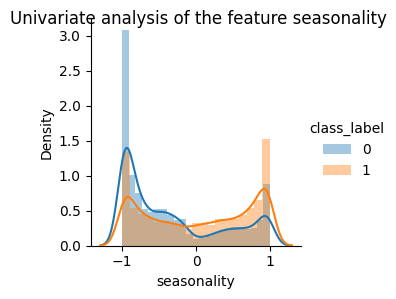

Box Plots to analyze the seasonality distribution


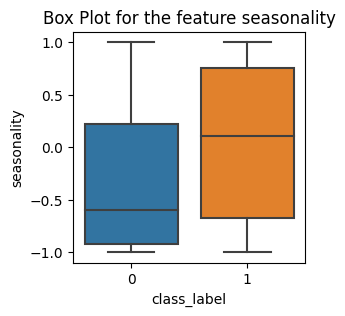

count    35743.000000
mean        -0.136297
std          0.720397
min         -0.999991
25%         -0.849817
50%         -0.304921
75%          0.594727
max          0.999991
Name: seasonality, dtype: float64
Analysis of year
Data Analysis of feature: year


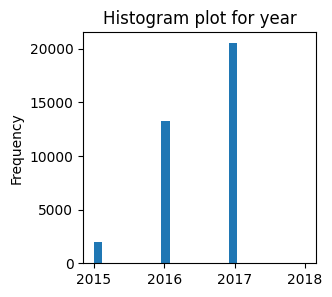

<Figure size 300x300 with 0 Axes>

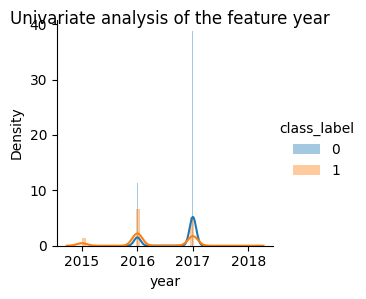

Box Plots to analyze the year distribution


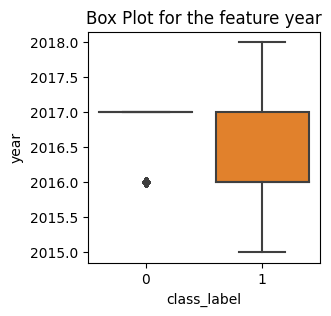

count    35743.000000
mean      2016.521137
std          0.600714
min       2015.000000
25%       2016.000000
50%       2017.000000
75%       2017.000000
max       2018.000000
Name: year, dtype: float64
Analysis of month
Data Analysis of feature: month


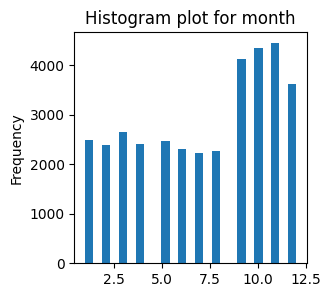

<Figure size 300x300 with 0 Axes>

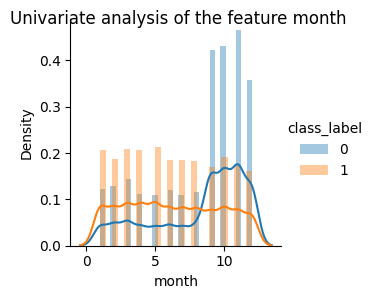

Box Plots to analyze the month distribution


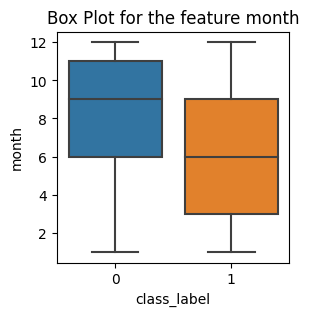

count    35743.000000
mean         7.211454
std          3.522599
min          1.000000
25%          4.000000
50%          8.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64
Analysis of day_of_week
Data Analysis of feature: day_of_week


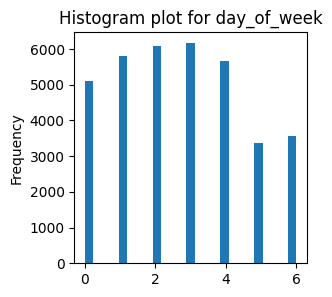

<Figure size 300x300 with 0 Axes>

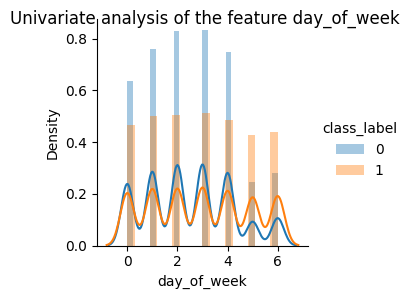

Box Plots to analyze the day_of_week distribution


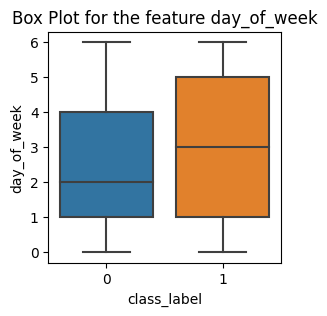

count    35743.000000
mean         2.723750
std          1.860882
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_week, dtype: float64
Analysis of text_word_count
Data Analysis of feature: text_word_count


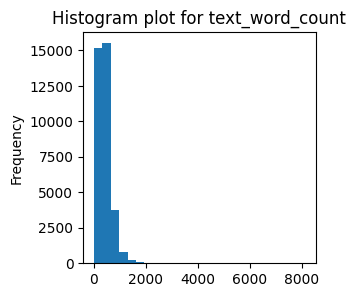

<Figure size 300x300 with 0 Axes>

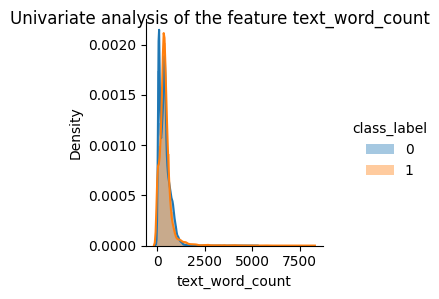

Box Plots to analyze the text_word_count distribution


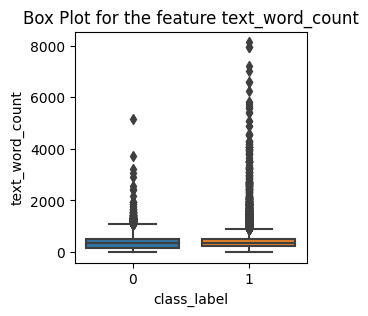

count    35743.000000
mean       403.821923
std        348.555251
min          0.000000
25%        202.000000
50%        361.000000
75%        510.000000
max       8135.000000
Name: text_word_count, dtype: float64
Analysis of sentiment_score_title
Data Analysis of feature: sentiment_score_title


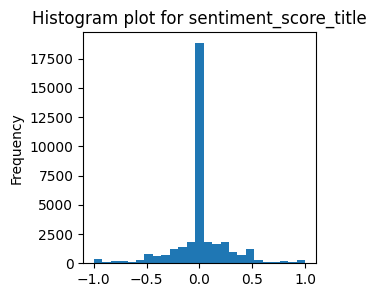

<Figure size 300x300 with 0 Axes>

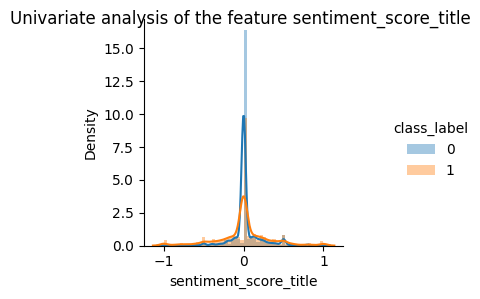

Box Plots to analyze the sentiment_score_title distribution


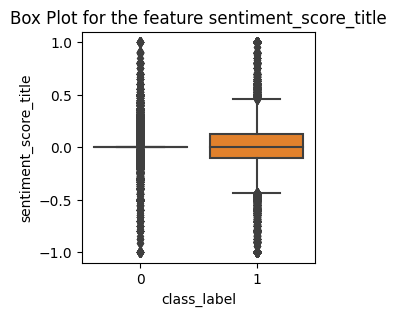

count    35743.000000
mean         0.013707
std          0.267339
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.050000
max          1.000000
Name: sentiment_score_title, dtype: float64
Analysis of sentiment_score_text
Data Analysis of feature: sentiment_score_text


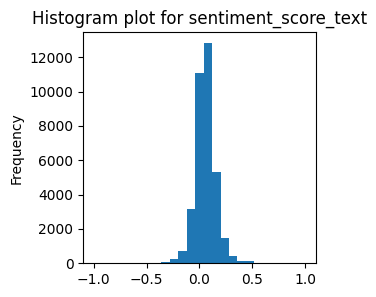

<Figure size 300x300 with 0 Axes>

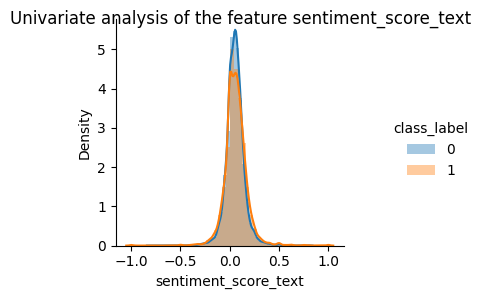

Box Plots to analyze the sentiment_score_text distribution


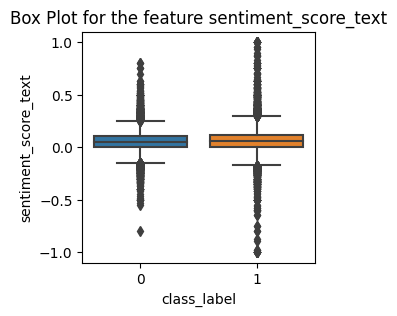

count    35743.000000
mean         0.057152
std          0.107013
min         -1.000000
25%          0.000000
50%          0.054266
75%          0.109297
max          1.000000
Name: sentiment_score_text, dtype: float64
Analysis of sentiment_scores_sum
Data Analysis of feature: sentiment_scores_sum


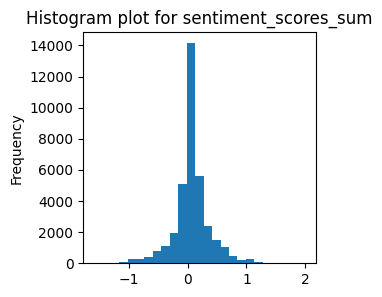

<Figure size 300x300 with 0 Axes>

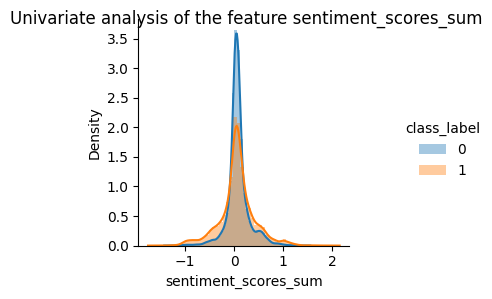

Box Plots to analyze the sentiment_scores_sum distribution


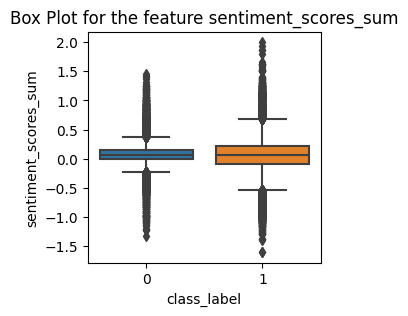

count    35743.000000
mean         0.070859
std          0.306921
min         -1.601562
25%         -0.033520
50%          0.060642
75%          0.175936
max          2.000000
Name: sentiment_scores_sum, dtype: float64


In [ ]:
# Loop through all features
cols = ["subject_encoded", "title_word_count", "day", "trend", "residual", "seasonality", "year", "month", "day_of_week", "text_word_count", "sentiment_score_title", "sentiment_score_text", "sentiment_scores_sum"]
for col in cols:
    print("Analysis of {}".format(col))
    plot_numerical_features(col)

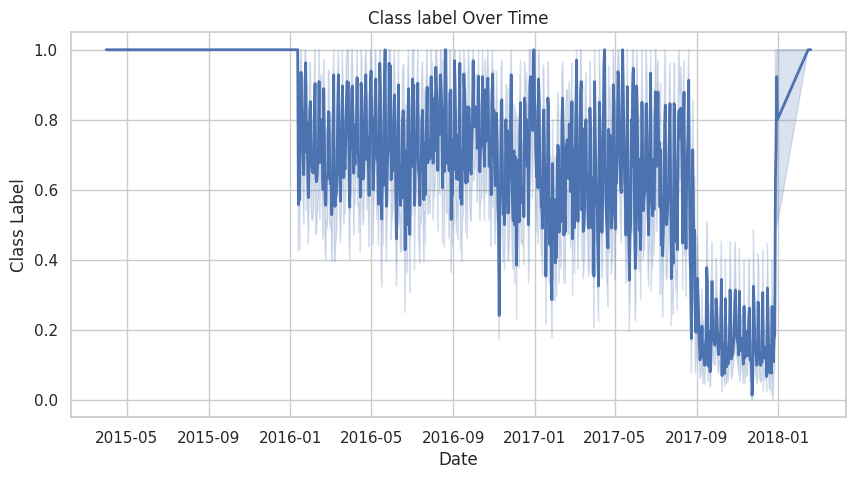

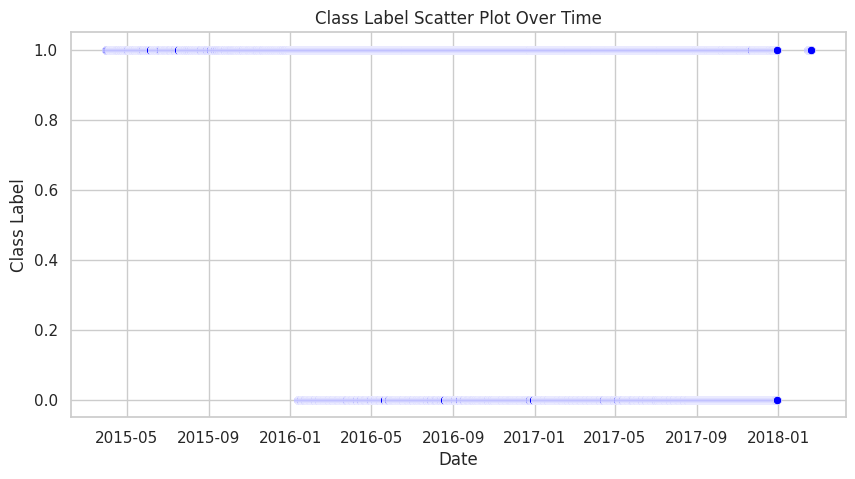

In [ ]:
#!pip install matplotlib seaborn pandas
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot for visualization with time
# Set the plot style
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(10, 5))
sns.lineplot(x='date', y='class_label', data=train_df, linewidth=2)
plt.xlabel('Date')
plt.ylabel('Class Label')
plt.title('Class label Over Time')
plt.show()

# Create a scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='date', y='class_label', data=train_df, color='blue')
plt.xlabel('Date')
plt.ylabel('Class Label')
plt.title('Class Label Scatter Plot Over Time')
plt.show()

In [ ]:
train_df

,title,text,date,class_label,subject_encoded,day_of_week,day,month,year,title_word_count,text_word_count,sentiment_score_title,sentiment_score_text,sentiment_scores_sum,trend,seasonality,residual
37303,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,2015-03-31,1,5,1,31,3,2015,21,210,-0.30,-0.038030,-0.338030,0.00,0.999769,-0.039128
37306,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,2015-03-31,1,5,1,31,3,2015,20,493,0.25,0.102236,0.352236,0.05,0.999769,-0.023423
43336,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,1,4,1,31,3,2015,12,322,0.50,0.200397,0.700397,0.10,0.999769,0.368758
37302,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,2015-03-31,1,5,1,31,3,2015,9,1155,0.00,-0.116312,-0.116312,0.15,0.999769,-0.475736
43335,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,1,4,1,31,3,2015,15,123,0.10,0.214286,0.314286,0.20,0.999769,-0.112079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30472,WATCH: ’’Carpetbagger” Mitt Romney Takes Swipe...,The GOP presidential candidate who couldn t se...,2018-02-18,1,5,6,18,2,2018,15,230,0.25,0.251259,0.501259,1786.90,0.746972,-0.456792
30474,HIGH SCHOOL TEACHER Makes “Shooting At Trump” ...,EAG News A Wyoming high school is under fire ...,2018-02-18,1,5,6,18,2,2018,14,619,0.08,0.068677,0.148677,1786.95,0.746972,0.247931
30467,Democrat Senator Warns Mueller Not To Release ...,"According to The Hill, Democrat Senator Bob Ca...",2018-02-19,1,5,0,19,2,2018,13,181,0.00,0.154604,0.154604,1787.00,0.758306,-0.622762
30469,WATCH: SNOWFLAKES ASKED Communist Party Platfo...,Ami Horowitz is fantastic! Check out this man ...,2018-02-19,1,5,0,19,2,2018,11,137,0.00,0.171429,0.171429,1787.05,0.758306,-0.294652


## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# List of columns to scale
columns_to_scale = ['subject_encoded', 'title_word_count', 'trend', 'residual', 'seasonality', 'day', 'year', 'month', 'day_of_week', 'text_word_count', 'sentiment_score_title', 'sentiment_score_text', 'sentiment_scores_sum']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the selected columns
train_df[columns_to_scale] = scaler.fit_transform(train_df[columns_to_scale])
x_test[columns_to_scale] = scaler.fit_transform(x_test[columns_to_scale])
train_df

,title,text,date,class_label,subject_encoded,day_of_week,day,month,year,title_word_count,text_word_count,sentiment_score_title,sentiment_score_text,sentiment_scores_sum,trend,seasonality,residual
37303,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,2015-03-31,1,0.139313,-0.926321,1.785002,-1.195570,-2.532249,2.067467,-0.556080,-1.173460,-0.889456,-1.332249,-1.732002,1.577020,-0.139241
37306,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,2015-03-31,1,0.139313,-0.926321,1.785002,-1.195570,-2.532249,1.824965,0.255854,0.883886,0.421296,0.916788,-1.731905,1.577020,-0.086433
43336,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,1,-0.348725,-0.926321,1.785002,-1.195570,-2.532249,-0.115046,-0.234749,1.819043,1.338586,2.051172,-1.731809,1.577020,1.232321
37302,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,2015-03-31,1,0.139313,-0.926321,1.785002,-1.195570,-2.532249,-0.842551,2.155149,-0.051271,-1.620979,-0.609843,-1.731712,1.577020,-1.607385
43335,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,1,-0.348725,-0.926321,1.785002,-1.195570,-2.532249,0.612458,-0.805685,0.322792,1.468375,0.793138,-1.731615,1.577020,-0.384548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30472,WATCH: ’’Carpetbagger” Mitt Romney Takes Swipe...,The GOP presidential candidate who couldn t se...,2018-02-18,1,0.139313,1.760615,0.284528,-1.479455,2.461875,0.612458,-0.498700,0.883886,1.813878,1.402337,1.731615,1.226102,-1.543685
30474,HIGH SCHOOL TEACHER Makes “Shooting At Trump” ...,EAG News A Wyoming high school is under fire ...,2018-02-18,1,0.139313,1.760615,0.284528,-1.479455,2.461875,0.369957,0.617351,0.247979,0.107698,0.253549,1.731712,1.226102,0.826027
30467,Democrat Senator Warns Mueller Not To Release ...,"According to The Hill, Democrat Senator Bob Ca...",2018-02-19,1,0.139313,-1.463708,0.399949,-1.479455,2.461875,0.127455,-0.639282,-0.051271,0.910668,0.272862,1.731809,1.241835,-2.101779
30469,WATCH: SNOWFLAKES ASKED Communist Party Platfo...,Ami Horowitz is fantastic! Check out this man ...,2018-02-19,1,0.139313,-1.463708,0.399949,-1.479455,2.461875,-0.357548,-0.765519,-0.051271,1.067885,0.327679,1.731905,1.241835,-0.998470


In [ ]:
train_df

,title,text,date,class_label,subject_encoded,day_of_week,day,month,year,title_word_count,text_word_count,sentiment_score_title,sentiment_score_text,sentiment_scores_sum,trend,seasonality,residual
37303,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,2015-03-31,1,0.139313,-0.926321,1.785002,-1.195570,-2.532249,2.067467,-0.556080,-1.173460,-0.889456,-1.332249,-1.732002,1.577020,-0.139241
37306,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,2015-03-31,1,0.139313,-0.926321,1.785002,-1.195570,-2.532249,1.824965,0.255854,0.883886,0.421296,0.916788,-1.731905,1.577020,-0.086433
43336,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,1,-0.348725,-0.926321,1.785002,-1.195570,-2.532249,-0.115046,-0.234749,1.819043,1.338586,2.051172,-1.731809,1.577020,1.232321
37302,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,2015-03-31,1,0.139313,-0.926321,1.785002,-1.195570,-2.532249,-0.842551,2.155149,-0.051271,-1.620979,-0.609843,-1.731712,1.577020,-1.607385
43335,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,1,-0.348725,-0.926321,1.785002,-1.195570,-2.532249,0.612458,-0.805685,0.322792,1.468375,0.793138,-1.731615,1.577020,-0.384548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30472,WATCH: ’’Carpetbagger” Mitt Romney Takes Swipe...,The GOP presidential candidate who couldn t se...,2018-02-18,1,0.139313,1.760615,0.284528,-1.479455,2.461875,0.612458,-0.498700,0.883886,1.813878,1.402337,1.731615,1.226102,-1.543685
30474,HIGH SCHOOL TEACHER Makes “Shooting At Trump” ...,EAG News A Wyoming high school is under fire ...,2018-02-18,1,0.139313,1.760615,0.284528,-1.479455,2.461875,0.369957,0.617351,0.247979,0.107698,0.253549,1.731712,1.226102,0.826027
30467,Democrat Senator Warns Mueller Not To Release ...,"According to The Hill, Democrat Senator Bob Ca...",2018-02-19,1,0.139313,-1.463708,0.399949,-1.479455,2.461875,0.127455,-0.639282,-0.051271,0.910668,0.272862,1.731809,1.241835,-2.101779
30469,WATCH: SNOWFLAKES ASKED Communist Party Platfo...,Ami Horowitz is fantastic! Check out this man ...,2018-02-19,1,0.139313,-1.463708,0.399949,-1.479455,2.461875,-0.357548,-0.765519,-0.051271,1.067885,0.327679,1.731905,1.241835,-0.998470


In [ ]:
x_test

,title,text,date,subject_encoded,day_of_week,day,month,year,title_word_count,text_word_count,sentiment_score_title,sentiment_score_text,sentiment_scores_sum,trend,seasonality,residual
37301,MUSLIM WOMAN ARRESTED FOR SPITTING ON HER FELL...,This woman s having trouble entering the Walma...,2015-04-01,0.147429,-0.389606,-1.679902,-0.914495,-2.515369,1.368225,-0.178891,0.581410,-1.116608,0.120890,-1.731857,1.574067,0.901794
37298,FED’S PREVENT ‘Mother of the Year’ From Boardi...,There are just way too many wannabe male and f...,2015-04-04,0.147429,1.226698,-1.336238,-0.914495,-2.515369,1.859632,-0.448640,-1.554512,0.277077,-1.263000,-1.731469,1.572530,0.355008
43333,[VIDEO] 16 YR OLD ARRESTED For Violent Gang Be...,This is a sad commentary on a generation who h...,2015-04-04,-0.337096,1.226698,-1.336238,-0.914495,-2.515369,1.613928,0.159673,-0.452856,-0.765902,-0.661700,-1.731082,1.572530,0.452708
37296,LISTEN TO THIS FORMER DOJ WHISTLEBLOWER,THE CONGRESS IS THERE TO DO WHAT S BEST FOR TH...,2015-04-05,0.147429,1.765465,-1.221683,-0.914495,-2.515369,-1.580218,-1.012913,-0.046802,2.642868,0.876121,-1.730694,1.571198,-0.460552
37287,(VIDEO) UN CLIMATE CHANGE FREAKS: “We should m...,What an evil bunch of freaks! The agenda is so...,2015-04-06,0.147429,-1.467141,-1.107128,-0.914495,-2.515369,0.631114,-0.066036,-0.046802,-0.741116,-0.298078,-1.730306,1.569458,-0.581860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30505,WATCH: SENATOR LINDSEY GRAHAM DROPS BOMBSHELL…...,Everyone suspected the sketchy Steele Dossier ...,2017-12-31,0.147429,1.765465,1.756742,1.375041,0.787208,2.351039,3.082879,-0.675014,-0.386592,-0.724322,1.730306,0.190724,1.839375
30501,JUST IN: CROOKED DOJ OFFICIAL Didn’t Reveal Th...,We ve been covering the curious case of DOJ of...,2018-02-14,0.147429,-0.389606,-0.190690,-1.486879,2.438496,2.351039,0.545030,-0.046802,-0.230658,-0.120955,1.730694,1.158324,-0.196871
30493,TWO HIGH SCHOOL JROTC Members Tell INCREDIBLE ...,ABC News When two Marjory Stoneman Douglas Hi...,2018-02-15,0.147429,0.149162,-0.076135,-1.486879,2.438496,2.842446,-0.214674,1.950913,-0.086709,1.675637,1.731082,1.175198,1.505733
30489,WATCH: Mitt Romney Announces Run for Senate…Ba...,Just what we need another Trump-bashing RINO. ...,2018-02-16,0.147429,0.687930,0.038420,-1.486879,2.438496,0.139707,-0.729400,-0.046802,1.549202,0.496633,1.731469,1.191781,-1.194290


In [ ]:
y_test

,class_label
37301,1
37298,1
43333,1
37296,1
37287,1
...,...
30505,1
30501,1
30493,1
30489,1


##Preprocessing for GloVe


In [ ]:
from tkinter.constants import Y
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load stopwords and initialize tokenizer
stop_words = set(stopwords.words("english"))
tokenizer = RegexpTokenizer(r'\w+')

# Prepare text data for GloVe embedding
train = []
for par in train_df["text"].values:
    tmp = []
    sentences = nltk.sent_tokenize(par)
    for sent in sentences:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
        tmp.extend(filtered_words)
    train.append(tmp)
# In the code above, the text data is processed within the same loop that constructs the list X. After this data cleaning step, you can proceed to use the X list to create word embeddings using the GloVe pre-trained model or train your own embeddings if you have a sufficiently large and domain-specific dataset.

# Make sure that the preprocessing steps are consistent when training your own word embeddings or using pre-trained models like GloVe. Consistency ensures that words in your dataset are represented in a similar way to the words in the GloVe vocabulary, enabling meaningful embeddings to be generated.

test = []
for par in x_test["text"].values:
    tmp = []
    sentences = nltk.sent_tokenize(par)
    for sent in sentences:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
        tmp.extend(filtered_words)
    test.append(tmp)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##GloVe

In [ ]:
import spacy
from spacy.vectors import Vectors

# uploaded the file with 100-dimensional word vectors
uploaded_file_path = 'glove.6B.100d.txt'  # Provide the correct file path

# Load word vectors into a dictionary using 'latin-1' encoding, skipping invalid lines
word_vectors = {}
with open(uploaded_file_path, 'r', encoding='latin-1') as file:
    for line in file:
        try:
            values = line.strip().split()
            word = values[0]
            vector = [float(val) for val in values[1:]]
            word_vectors[word] = vector
        except (ValueError, IndexError):
            # Skip lines that cannot be converted to floats or don't have enough values
            continue

# Now, word_vectors dictionary contains words as keys and their corresponding 100-dimensional vectors as values

In [ ]:
# Create word embeddings for processed text data using loaded GloVe word vectors
word_embeddings = []
for sentence in train:
    sentence_embeddings = []
    for word in sentence:
        # Check if the word is in the word_vectors dictionary
        if word in word_vectors:
            # Get the word vector from the loaded GloVe word vectors
            word_vector = word_vectors[word]
            sentence_embeddings.append(word_vector)
    # If sentence_embeddings is not empty, calculate the average vector for the sentence
    if sentence_embeddings:
        average_vector = np.mean(sentence_embeddings, axis=0)
        word_embeddings.append(average_vector)
    else:
        # If the sentence doesn't contain any words from the word_vectors dictionary, consider it as all zeros vector
        word_embeddings.append(np.zeros(100))  # Assuming 100-dimensional word vectors

# Convert word_embeddings to numpy array for further processing
word_embeddings_array = np.array(word_embeddings)
print("Word embeddings shape:", word_embeddings_array.shape)

Word embeddings shape: (35743, 100)


In [ ]:
# Create word embeddings for processed text data using loaded GloVe word vectors
word_embeddings_test = []
for sentence in test:
    sentence_embeddings_test = []
    for word in sentence:
        # Check if the word is in the word_vectors dictionary
        if word in word_vectors:
            # Get the word vector from the loaded GloVe word vectors
            word_vector = word_vectors[word]
            sentence_embeddings_test.append(word_vector)
    # If sentence_embeddings is not empty, calculate the average vector for the sentence
    if sentence_embeddings_test:
        average_vector_test = np.mean(sentence_embeddings_test, axis=0)
        word_embeddings_test.append(average_vector_test)
    else:
        # If the sentence doesn't contain any words from the word_vectors dictionary, consider it as all zeros vector
        word_embeddings_test.append(np.zeros(100))  # Assuming 100-dimensional word vectors

# Convert word_embeddings to numpy array for further processing
word_embeddings_array_test = np.array(word_embeddings_test)
print("Word embeddings shape:", word_embeddings_array_test.shape)

Word embeddings shape: (8936, 100)


In [ ]:
# Create a new dataframe for word embeddings
train_embeddings_df = pd.DataFrame(word_embeddings_array, columns=[f"embedding_{i}" for i in range(word_embeddings_array.shape[1])])
test_embeddings_df = pd.DataFrame(word_embeddings_array_test, columns=[f"embedding_{i}" for i in range(word_embeddings_array_test.shape[1])])

# Drop the text, title, date and subject columns as they have been converted into numerical format and subject is completely different for the 2 classes.
train_df = train_df.drop(['title', 'text', 'date', 'subject_encoded'], axis = 1)
x_test = x_test.drop(['title', 'text', 'date', 'subject_encoded'], axis = 1)

In [ ]:
train_df

,class_label,day_of_week,day,month,year,title_word_count,text_word_count,sentiment_score_title,sentiment_score_text,sentiment_scores_sum,trend,seasonality,residual
37303,1,-0.926321,1.785002,-1.195570,-2.532249,2.067467,-0.556080,-1.173460,-0.889456,-1.332249,-1.732002,1.577020,-0.139241
37306,1,-0.926321,1.785002,-1.195570,-2.532249,1.824965,0.255854,0.883886,0.421296,0.916788,-1.731905,1.577020,-0.086433
43336,1,-0.926321,1.785002,-1.195570,-2.532249,-0.115046,-0.234749,1.819043,1.338586,2.051172,-1.731809,1.577020,1.232321
37302,1,-0.926321,1.785002,-1.195570,-2.532249,-0.842551,2.155149,-0.051271,-1.620979,-0.609843,-1.731712,1.577020,-1.607385
43335,1,-0.926321,1.785002,-1.195570,-2.532249,0.612458,-0.805685,0.322792,1.468375,0.793138,-1.731615,1.577020,-0.384548
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30472,1,1.760615,0.284528,-1.479455,2.461875,0.612458,-0.498700,0.883886,1.813878,1.402337,1.731615,1.226102,-1.543685
30474,1,1.760615,0.284528,-1.479455,2.461875,0.369957,0.617351,0.247979,0.107698,0.253549,1.731712,1.226102,0.826027
30467,1,-1.463708,0.399949,-1.479455,2.461875,0.127455,-0.639282,-0.051271,0.910668,0.272862,1.731809,1.241835,-2.101779
30469,1,-1.463708,0.399949,-1.479455,2.461875,-0.357548,-0.765519,-0.051271,1.067885,0.327679,1.731905,1.241835,-0.998470


##Padding


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Concatenate word embeddings with the original dataframe
train_df.reset_index(drop=True, inplace=True)
train_embeddings_df.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
test_embeddings_df.reset_index(drop=True, inplace=True)

text_embeddings_padded_train = pad_sequences(train_embeddings_df.to_numpy(), maxlen=100, padding='post', truncating='post', dtype='float32')
text_embeddings_padded_test = pad_sequences(test_embeddings_df.to_numpy(), maxlen=100, padding='post', truncating='post', dtype='float32')

text_embeddings_padded_train = pd.DataFrame(text_embeddings_padded_train)
text_embeddings_padded_test = pd.DataFrame(text_embeddings_padded_test)

train_df = pd.concat([train_df, text_embeddings_padded_train], axis=1)
x_test = pd.concat([x_test, text_embeddings_padded_test], axis=1)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35743 entries, 0 to 35742
Columns: 113 entries, class_label to 99
dtypes: float32(100), float64(12), int64(1)
memory usage: 17.2 MB


In [ ]:
train_df

,class_label,day_of_week,day,month,year,title_word_count,text_word_count,sentiment_score_title,sentiment_score_text,sentiment_scores_sum,...,90,91,92,93,94,95,96,97,98,99
0,1,-0.926321,1.785002,-1.195570,-2.532249,2.067467,-0.556080,-1.173460,-0.889456,-1.332249,...,-0.018096,-0.103482,-0.070176,-0.051228,-0.401737,0.100679,-0.135632,-0.235215,0.314161,0.117362
1,1,-0.926321,1.785002,-1.195570,-2.532249,1.824965,0.255854,0.883886,0.421296,0.916788,...,0.052983,-0.113025,-0.067991,0.096134,-0.136682,0.094850,-0.042049,-0.116536,0.281204,0.058128
2,1,-0.926321,1.785002,-1.195570,-2.532249,-0.115046,-0.234749,1.819043,1.338586,2.051172,...,0.015858,-0.039120,-0.035783,0.214779,-0.309864,0.023368,-0.048158,-0.039133,0.284645,0.142011
3,1,-0.926321,1.785002,-1.195570,-2.532249,-0.842551,2.155149,-0.051271,-1.620979,-0.609843,...,-0.113125,-0.137442,-0.120064,-0.027360,-0.195909,0.117859,0.081732,0.020971,0.266228,-0.289081
4,1,-0.926321,1.785002,-1.195570,-2.532249,0.612458,-0.805685,0.322792,1.468375,0.793138,...,0.087951,-0.137604,0.042670,0.141208,-0.401792,0.064461,0.070735,0.114941,0.241007,0.039567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35738,1,1.760615,0.284528,-1.479455,2.461875,0.612458,-0.498700,0.883886,1.813878,1.402337,...,0.063598,-0.129063,0.000129,0.176165,-0.569956,-0.008785,-0.089152,0.110916,0.394770,0.030330
35739,1,1.760615,0.284528,-1.479455,2.461875,0.369957,0.617351,0.247979,0.107698,0.253549,...,-0.009350,-0.130011,-0.011403,0.123238,-0.494562,0.063455,-0.136906,-0.114678,0.407745,0.107145
35740,1,-1.463708,0.399949,-1.479455,2.461875,0.127455,-0.639282,-0.051271,0.910668,0.272862,...,0.135681,-0.112237,-0.124322,0.247709,-0.304187,0.202060,0.056098,0.002158,0.229767,0.096493
35741,1,-1.463708,0.399949,-1.479455,2.461875,-0.357548,-0.765519,-0.051271,1.067885,0.327679,...,0.126667,-0.224657,-0.079092,-0.067796,-0.427678,-0.032715,-0.086453,-0.105322,0.241099,0.241389


In [ ]:
#Splitting the target labels and features in train_df
x_train = train_df.drop(['class_label'], axis = 1) # Dropping target label from features set
y_train = train_df['class_label'] # Target label
x_train

,day_of_week,day,month,year,title_word_count,text_word_count,sentiment_score_title,sentiment_score_text,sentiment_scores_sum,trend,...,90,91,92,93,94,95,96,97,98,99
0,-0.926321,1.785002,-1.195570,-2.532249,2.067467,-0.556080,-1.173460,-0.889456,-1.332249,-1.732002,...,-0.018096,-0.103482,-0.070176,-0.051228,-0.401737,0.100679,-0.135632,-0.235215,0.314161,0.117362
1,-0.926321,1.785002,-1.195570,-2.532249,1.824965,0.255854,0.883886,0.421296,0.916788,-1.731905,...,0.052983,-0.113025,-0.067991,0.096134,-0.136682,0.094850,-0.042049,-0.116536,0.281204,0.058128
2,-0.926321,1.785002,-1.195570,-2.532249,-0.115046,-0.234749,1.819043,1.338586,2.051172,-1.731809,...,0.015858,-0.039120,-0.035783,0.214779,-0.309864,0.023368,-0.048158,-0.039133,0.284645,0.142011
3,-0.926321,1.785002,-1.195570,-2.532249,-0.842551,2.155149,-0.051271,-1.620979,-0.609843,-1.731712,...,-0.113125,-0.137442,-0.120064,-0.027360,-0.195909,0.117859,0.081732,0.020971,0.266228,-0.289081
4,-0.926321,1.785002,-1.195570,-2.532249,0.612458,-0.805685,0.322792,1.468375,0.793138,-1.731615,...,0.087951,-0.137604,0.042670,0.141208,-0.401792,0.064461,0.070735,0.114941,0.241007,0.039567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35738,1.760615,0.284528,-1.479455,2.461875,0.612458,-0.498700,0.883886,1.813878,1.402337,1.731615,...,0.063598,-0.129063,0.000129,0.176165,-0.569956,-0.008785,-0.089152,0.110916,0.394770,0.030330
35739,1.760615,0.284528,-1.479455,2.461875,0.369957,0.617351,0.247979,0.107698,0.253549,1.731712,...,-0.009350,-0.130011,-0.011403,0.123238,-0.494562,0.063455,-0.136906,-0.114678,0.407745,0.107145
35740,-1.463708,0.399949,-1.479455,2.461875,0.127455,-0.639282,-0.051271,0.910668,0.272862,1.731809,...,0.135681,-0.112237,-0.124322,0.247709,-0.304187,0.202060,0.056098,0.002158,0.229767,0.096493
35741,-1.463708,0.399949,-1.479455,2.461875,-0.357548,-0.765519,-0.051271,1.067885,0.327679,1.731905,...,0.126667,-0.224657,-0.079092,-0.067796,-0.427678,-0.032715,-0.086453,-0.105322,0.241099,0.241389


In [ ]:
y_train

0        1
1        1
2        1
3        1
4        1
        ..
35738    1
35739    1
35740    1
35741    1
35742    1
Name: class_label, Length: 35743, dtype: int64

In [ ]:
x_test

,day_of_week,day,month,year,title_word_count,text_word_count,sentiment_score_title,sentiment_score_text,sentiment_scores_sum,trend,...,90,91,92,93,94,95,96,97,98,99
0,-0.389606,-1.679902,-0.914495,-2.515369,1.368225,-0.178891,0.581410,-1.116608,0.120890,-1.731857,...,0.047688,-0.123378,-0.024950,-0.062880,-0.387860,0.072342,-0.193882,-0.088106,0.368652,0.065057
1,1.226698,-1.336238,-0.914495,-2.515369,1.859632,-0.448640,-1.554512,0.277077,-1.263000,-1.731469,...,0.069286,-0.220634,-0.034654,-0.029680,-0.318788,0.061256,-0.110576,-0.060071,0.345090,0.033083
2,1.226698,-1.336238,-0.914495,-2.515369,1.613928,0.159673,-0.452856,-0.765902,-0.661700,-1.731082,...,0.016237,-0.030768,0.004984,-0.025631,-0.389899,0.019138,-0.200546,-0.128160,0.364125,0.103258
3,1.765465,-1.221683,-0.914495,-2.515369,-1.580218,-1.012913,-0.046802,2.642868,0.876121,-1.730694,...,0.106653,-0.193731,-0.127728,0.069880,-0.394054,-0.139544,-0.279946,-0.114781,0.302054,0.140129
4,-1.467141,-1.107128,-0.914495,-2.515369,0.631114,-0.066036,-0.046802,-0.741116,-0.298078,-1.730306,...,0.030195,-0.081485,-0.107771,-0.059074,-0.356850,-0.016219,-0.154891,-0.186923,0.423209,0.114829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8931,1.765465,1.756742,1.375041,0.787208,2.351039,3.082879,-0.675014,-0.386592,-0.724322,1.730306,...,-0.021636,-0.060700,-0.005814,0.048235,-0.023999,0.046668,-0.074712,-0.158297,0.163652,0.056937
8932,-0.389606,-0.190690,-1.486879,2.438496,2.351039,0.545030,-0.046802,-0.230658,-0.120955,1.730694,...,-0.018458,-0.076498,-0.007125,0.033587,-0.024231,0.061030,-0.046407,-0.221160,0.271889,-0.028438
8933,0.149162,-0.076135,-1.486879,2.438496,2.842446,-0.214674,1.950913,-0.086709,1.675637,1.731082,...,0.139671,-0.151471,-0.023072,0.124274,-0.463091,0.022027,-0.137199,-0.007053,0.339860,0.132313
8934,0.687930,0.038420,-1.486879,2.438496,0.139707,-0.729400,-0.046802,1.549202,0.496633,1.731469,...,0.044286,-0.013495,0.007458,0.083199,-0.336925,-0.084205,-0.069106,0.017876,0.322242,0.043910


In [ ]:
y_test

,class_label
37301,1
37298,1
43333,1
37296,1
37287,1
...,...
30505,1
30501,1
30493,1
30489,1


In [ ]:
# Scaling of word embeddings is not necessary while using pre-trained embeddings like GloVe vectors.

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, test_size=0.25, stratify = y_train)
y_val = pd.DataFrame(y_val)
y_train = pd.DataFrame(y_train)
print("y_train:\n", y_train.value_counts())
print("y_val:\n", y_val.value_counts())

y_train:
 class_label
1              14080
0              12727
dtype: int64
y_val:
 class_label
1              4694
0              4242
dtype: int64


In [ ]:
x_train

,day_of_week,day,month,year,title_word_count,text_word_count,sentiment_score_title,sentiment_score_text,sentiment_scores_sum,trend,...,90,91,92,93,94,95,96,97,98,99
18907,1.223227,1.092475,-1.195570,0.797167,1.339962,-1.158575,0.759198,-0.534072,0.475074,0.100406,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12629,0.685840,1.438738,0.791627,-0.867541,-1.570055,-0.762650,-0.051271,-1.022548,-0.401189,-0.508039,...,0.089564,-0.100305,-0.003876,0.126947,-0.337686,0.151064,-0.151885,-0.021368,0.235432,0.108577
19529,-1.463708,-0.638841,-0.911685,0.797167,-0.115046,1.156728,1.819043,0.169296,1.643478,0.160688,...,-0.030494,-0.045492,-0.177998,0.072752,-0.381509,0.079075,-0.073909,-0.214314,0.341041,0.250504
2307,-0.388934,-0.292578,-1.763340,-0.867541,-1.570055,-0.458533,-0.633147,0.360849,-0.425676,-1.508415,...,0.065373,-0.033622,0.025003,0.000776,-0.459001,0.088774,-0.096281,-0.226976,0.487307,0.189897
14833,1.223227,0.169106,1.359398,-0.867541,-0.115046,0.083713,-0.051271,0.565625,0.152557,-0.294434,...,-0.006495,-0.051353,-0.126468,0.010314,-0.347343,-0.059568,-0.183424,0.016006,0.346867,0.126846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10656,0.685840,-1.562210,0.507742,-0.867541,-0.357548,-1.158575,-0.799397,-0.534072,-0.882516,-0.699256,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13557,0.148453,0.169106,1.075512,-0.867541,-0.115046,-0.200321,0.266115,-0.928092,-0.091800,-0.418100,...,-0.010809,0.125907,-0.002256,0.196959,-0.263852,0.002453,-0.190028,-0.102655,0.135618,0.013247
16902,-1.463708,-1.100525,-1.479455,0.797167,0.612458,-0.713877,-0.134396,-2.148545,-0.866193,-0.093912,...,-0.052693,-0.054105,-0.039542,-0.100175,-0.295611,0.104461,-0.034878,-0.060965,0.197348,0.212093
11596,0.685840,1.669581,0.507742,-0.867541,0.612458,-0.119988,1.819043,-1.844830,0.941216,-0.608154,...,0.029355,-0.031102,0.056445,0.031063,-0.269453,0.020479,-0.075421,-0.135864,0.207557,0.098856


In [ ]:
x_val

,day_of_week,day,month,year,title_word_count,text_word_count,sentiment_score_title,sentiment_score_text,sentiment_scores_sum,trend,...,90,91,92,93,94,95,96,97,98,99
17419,0.685840,0.169106,-1.479455,0.797167,-0.115046,-1.127016,3.689357,2.824198,4.198266,-0.043806,...,-0.050247,0.366152,0.186591,0.056176,-0.039466,-0.172389,-0.351054,-0.267375,0.035993,0.292070
29850,-0.388934,1.092475,0.791627,0.797167,-1.085052,-0.094167,-0.051271,0.703737,0.200712,1.160968,...,-0.023434,-0.087811,-0.191138,-0.168282,-0.451740,0.008199,0.046004,-0.097858,0.532866,0.005556
21122,0.148453,1.092475,-0.627799,0.797167,-0.357548,-0.386808,-0.051271,-0.289174,-0.145485,0.315077,...,0.175125,-0.193172,-0.126242,0.052028,-0.190919,0.225617,-0.079595,-0.092715,0.202549,0.056705
30034,0.148453,1.207896,0.791627,0.797167,3.522475,0.964504,-0.273118,2.097906,0.493578,1.178801,...,0.029653,-0.128181,0.041303,-0.012898,-0.353227,-0.024280,-0.079825,-0.148424,0.206947,0.115716
21292,-0.388934,1.785002,-0.627799,0.797167,-1.327553,-0.487223,-0.051271,1.192776,0.371224,0.331553,...,0.131838,-0.166660,-0.205021,-0.166105,-0.590644,0.258502,0.124716,-0.081434,0.556019,-0.197452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12711,1.760615,1.669581,0.791627,-0.867541,1.824965,-0.581901,-0.051271,1.402730,0.444428,-0.500091,...,0.080986,0.024012,0.094769,0.210525,-0.334805,0.036893,-0.122229,0.000491,0.253834,0.159189
32879,1.223227,1.092475,1.075512,0.797167,-1.570055,0.313235,-0.051271,0.090057,-0.013259,1.454529,...,-0.028027,-0.034876,-0.207416,0.063069,-0.525152,0.192383,-0.055639,-0.163331,0.405288,0.040905
30233,1.223227,1.438738,0.791627,0.797167,-1.085052,0.792362,-0.051271,-0.111505,-0.083537,1.198087,...,0.130298,-0.105423,-0.245924,0.200119,-0.556960,0.111923,-0.087053,0.024814,0.412066,0.123753
15797,-1.463708,0.053685,-1.763340,0.797167,-1.085052,0.080844,-0.051271,-0.394438,-0.182187,-0.201006,...,0.059542,-0.125864,-0.007053,-0.041916,-0.217324,0.081447,-0.066235,-0.162843,0.284773,0.180500


# Model training

In [ ]:
!pip install scikit-optimize --q
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN

# Tabulate results
results_table = []

# Print metrics
def print_metrics(model, y_pred, classifier, model_history=None, all_charts=True):

  if model_history is not None:
    # create a figure with three subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # plot accuracy
    axs[0].plot(model_history['accuracy'])
    axs[0].plot(model_history['val_accuracy'])
    axs[0].set_title('Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['Train', 'Validate'], loc='upper left')

    # plot loss
    axs[1].plot(model_history['loss'])
    axs[1].plot(model_history['val_loss'])
    axs[1].set_title('Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['Train', 'Validate'], loc='upper right')

    # plot F1-score
    axs[2].plot(model_history['f1_m'])
    axs[2].plot(model_history['val_f1_m'])
    axs[2].set_title('F1-Score')
    axs[2].set_ylabel('F1')
    axs[2].set_xlabel('Epoch')
    axs[2].legend(['Train', 'Validate'], loc='upper left')

    # adjust the layout and spacing
    plt.tight_layout()

    # show the plot
    plt.show()

  # Create a figure with three subplots
  fig, axs = plt.subplots(1, 3, figsize=(15, 5))

  # Plot confusion matrix in the first subplot
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt='d', ax=axs[0])
  axs[0].set_xlabel('True label')
  axs[0].set_ylabel('Predicted label')
  axs[0].set_title('Confusion Matrix')

  # Plot Precision-Recall curve in the second subplot
  prCurve = PrecisionRecallDisplay.from_predictions(y_test, y_pred, ax=axs[1])
  _ = prCurve.ax_.set_title("Precision-Recall curve")

  # Plot ROC curve in the third subplot
  rocCurve = RocCurveDisplay.from_predictions(y_test, y_pred, ax=axs[2])
  _ = rocCurve.ax_.set_title("Receiver Operating Characteristic (ROC) curve")
  _ = axs[2].set_xlabel('False Positive Rate')
  _ = axs[2].set_ylabel('True Positive Rate')

  # Adjust the layout and spacing
  plt.tight_layout()

  # Show the plot
  plt.show()

  # Obtain f1-score, precision and Recall values to determine the performance of the model
  f1Score = f1_score(y_test, y_pred)
  precisionVal = precision_score(y_test, y_pred)
  recallVal = recall_score(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)

  print("{}".format(classifier))
  print("f1-score: {:.2f}%".format(f1Score*100))
  print("Precision: {:.2f}%".format(precisionVal*100))
  print("Recall: {:.2f}%".format(recallVal*100))
  print("Accuracy: {:.2f}%".format(acc*100))

  return[classifier, f1Score*100, precisionVal*100, recallVal*100, acc*100]

In [ ]:
import numpy as np
from sklearn.metrics import log_loss
from imblearn.over_sampling import ADASYN

# Assuming x_train, x_test, and x_val are DataFrames
# Assuming y_train is a pandas Series, convert it to a NumPy array
y_train = np.array(y_train)

# Reshape x_train to have three dimensions (samples, time_steps, features)
time_steps = 1  # You may adjust this based on your data and how it should be split into time steps
features = x_train.shape[1]  # Assuming x_train has multiple features

# Flatten to 2D array
x_train_flattened = x_train.to_numpy().reshape((x_train.shape[0], -1))
x_val_flattened = x_val.to_numpy().reshape((x_val.shape[0], -1))
x_test_flattened = x_test.to_numpy().reshape((x_test.shape[0], -1))

# Reshape flattened data to 3D arrays
x_train_reshaped = x_train_flattened.reshape((x_train_flattened.shape[0], time_steps, features))
x_val_reshaped = x_val_flattened.reshape((x_val_flattened.shape[0], time_steps, features))
x_test_reshaped = x_test_flattened.reshape((x_test_flattened.shape[0], time_steps, features))

# Create an ADASYN instance
adasyn = ADASYN(sampling_strategy='minority')  # You can adjust the sampling_strategy as needed

# Generate ADASYN samples
x_train_adasyn, y_train_adasyn = adasyn.fit_resample(x_train_flattened, y_train)
x_val_adasyn, y_val_adasyn = adasyn.fit_resample(x_val_flattened, y_val)

# Ensure that x_train_adasyn has the correct shape
x_train_adasyn_reshaped = x_train_adasyn.reshape((x_train_adasyn.shape[0], time_steps, features))
x_val_adasyn_reshaped = x_val_adasyn.reshape((x_val_adasyn.shape[0], time_steps, features))
# Now, x_train_adasyn_reshaped and y_train_adasyn contain the ADASYN-sampled data

# Run predictions
def finalPrediction(model, classifier, results_table, all_charts=True, reshape=False):
    # Fit on train data
    if classifier == "Random Forest Classifier with hyperparameter tuning" or classifier == "Random Forest Classifier with ADASYN and hyperparameter tuning":
        model.fit(x_train, y_train)
        x_test_reshaped = x_test
    else:
        model.fit(x_train_reshaped, y_train)
        x_test_reshaped = x_test_flattened.reshape((x_test_flattened.shape[0], time_steps, features))
    # Predict on test data
    y_pred = model.predict(x_test_reshaped)

    # Tabulate results
    result_list = print_metrics(model, y_pred, classifier, None, all_charts=all_charts)
    results_table.append(result_list)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(26807, 112)
(8936, 112)


##Random forest

RandomForestClassifier(max_depth=40, n_estimators=30, random_state=0)


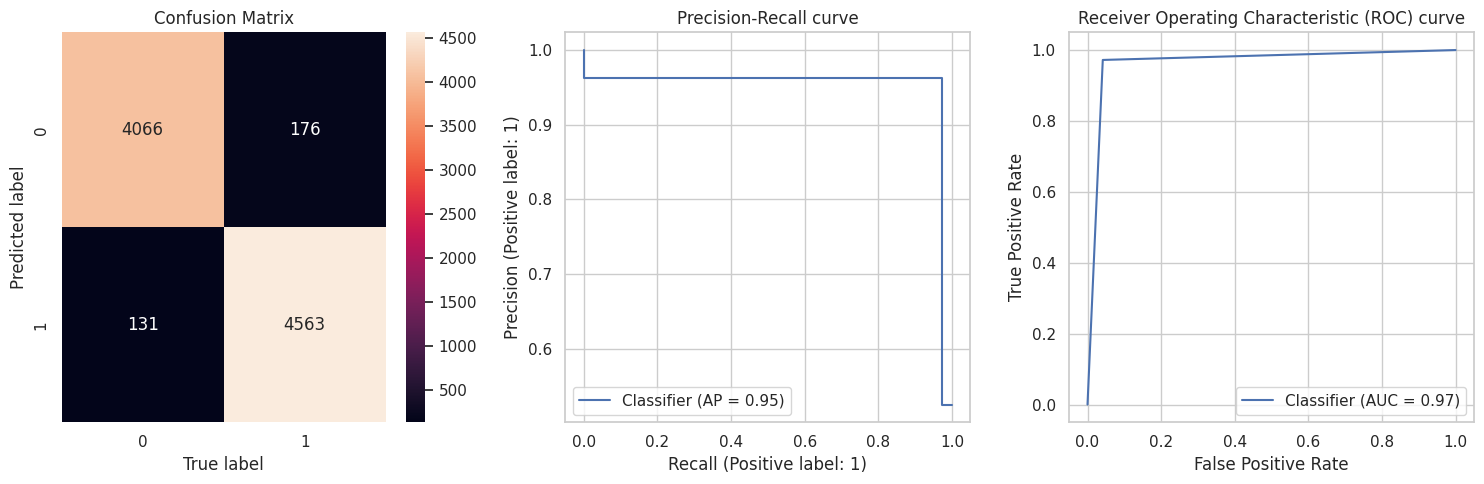

Random Forest Classifier with hyperparameter tuning
f1-score: 96.75%
Precision: 96.29%
Recall: 97.21%
Accuracy: 96.56%


In [ ]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit

# Time Series Split
tscv = TimeSeriesSplit(n_splits=5)

x_val= x_val.rename(str,axis="columns")

# Instantiate the classifier
randomForest = RandomForestClassifier(random_state=0)

# Define the parameters
params = {
    'n_estimators': [10, 20, 30],
    'max_depth': [20, 30, 40],
    'criterion':['gini', 'entropy'],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 3]
}

bayes = BayesSearchCV(estimator=randomForest,
                      search_spaces=params,
                      n_iter=50,
                      cv=tscv,
                      n_jobs=-1,
                      scoring="f1",
                      random_state=0)
bayes.fit(x_val, y_val)

rf_best = bayes.best_estimator_
print(rf_best)

x_val.columns = x_val.columns.astype(str)
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)
finalPrediction(rf_best, "Random Forest Classifier with hyperparameter tuning", results_table)

## ADASYN Random Forest

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN

# Instantiate the classifier
randomForest = RandomForestClassifier(random_state=0)
adasyn = ADASYN(sampling_strategy={0: 4690, 1: 4694}, random_state=0)

# Define the parameters
params = {
    'randomForest__n_estimators': [10, 20, 30],
    'randomForest__max_depth': [20, 30, 40],
    'randomForest__criterion': ['gini', 'entropy'],
    'randomForest__min_samples_split': [2, 5, 7],
    'randomForest__min_samples_leaf': [1, 2, 3]
}

# Include the sequence in a pipeline to avoid overfitting & data leakage during cross validation
pipeline = Pipeline([('adasyn',adasyn),('randomForest',randomForest)])

bayes = BayesSearchCV(pipeline,
                      search_spaces=params,
                      n_iter=50,
                      cv=tscv,
                      n_jobs=-1,
                      scoring="f1",
                      random_state=0)
bayes.fit(x_val, y_val)

rf_best_adasyn = bayes.best_estimator_
print(rf_best_adasyn)

Pipeline(steps=[('adasyn',
                 ADASYN(random_state=0, sampling_strategy={0: 4690, 1: 4694})),
                ('randomForest',
                 RandomForestClassifier(max_depth=20, min_samples_leaf=2,
                                        n_estimators=30, random_state=0))])


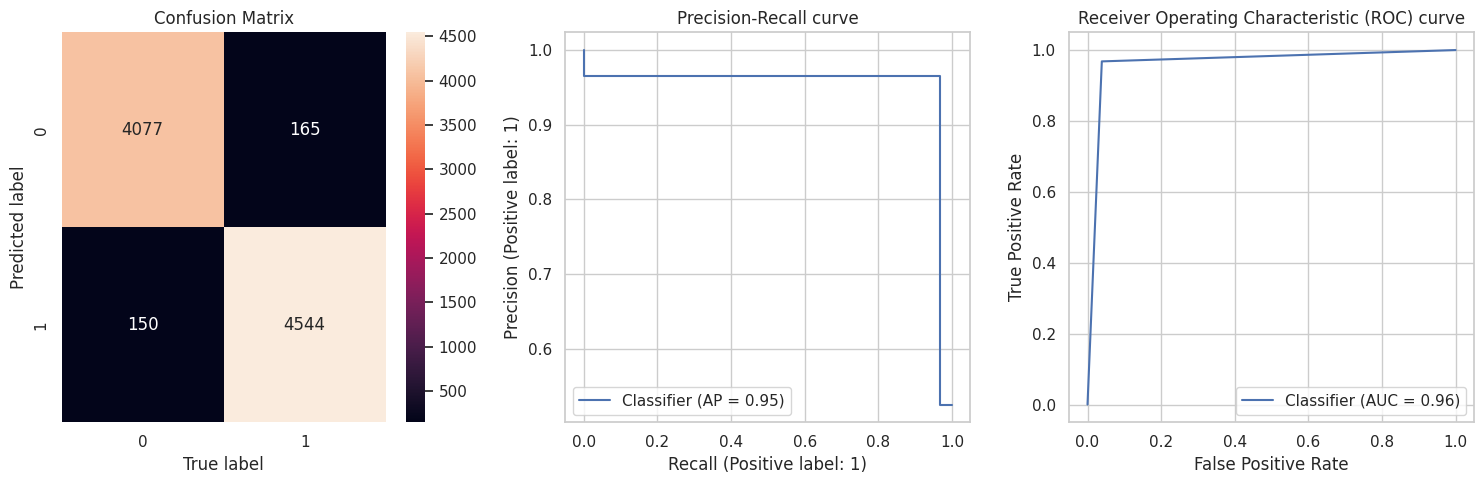

Random Forest Classifier with ADASYN and hyperparameter tuning
f1-score: 96.65%
Precision: 96.50%
Recall: 96.80%
Accuracy: 96.47%


In [ ]:
pipeline = Pipeline(steps=[('adasyn',
                 ADASYN(sampling_strategy='minority', random_state=0)),
                ('randomForest',
                 RandomForestClassifier(max_depth=40, min_samples_leaf=2,
                                        min_samples_split=7, n_estimators=30,
                                        random_state=0))])

finalPrediction(pipeline, "Random Forest Classifier with ADASYN and hyperparameter tuning", results_table)

## LSTM

Epoch 1/30
47/47 - 2s - loss: 0.5204 - accuracy: 0.8538 - 2s/epoch - 50ms/step
Epoch 2/30
47/47 - 0s - loss: 0.2636 - accuracy: 0.9121 - 287ms/epoch - 6ms/step
Epoch 3/30
47/47 - 0s - loss: 0.1777 - accuracy: 0.9437 - 342ms/epoch - 7ms/step
Epoch 4/30
47/47 - 0s - loss: 0.1507 - accuracy: 0.9477 - 348ms/epoch - 7ms/step
Epoch 5/30
47/47 - 0s - loss: 0.1371 - accuracy: 0.9531 - 350ms/epoch - 7ms/step
Epoch 6/30
47/47 - 0s - loss: 0.1260 - accuracy: 0.9544 - 349ms/epoch - 7ms/step
Epoch 7/30
47/47 - 0s - loss: 0.1188 - accuracy: 0.9571 - 341ms/epoch - 7ms/step
Epoch 8/30
47/47 - 0s - loss: 0.1155 - accuracy: 0.9598 - 318ms/epoch - 7ms/step
Epoch 9/30
47/47 - 0s - loss: 0.1121 - accuracy: 0.9611 - 336ms/epoch - 7ms/step
Epoch 10/30
47/47 - 0s - loss: 0.1036 - accuracy: 0.9618 - 340ms/epoch - 7ms/step
Epoch 11/30
47/47 - 0s - loss: 0.0991 - accuracy: 0.9651 - 337ms/epoch - 7ms/step
Epoch 12/30
47/47 - 0s - loss: 0.0950 - accuracy: 0.9685 - 352ms/epoch - 7ms/step
Epoch 13/30
47/47 - 0s - lo

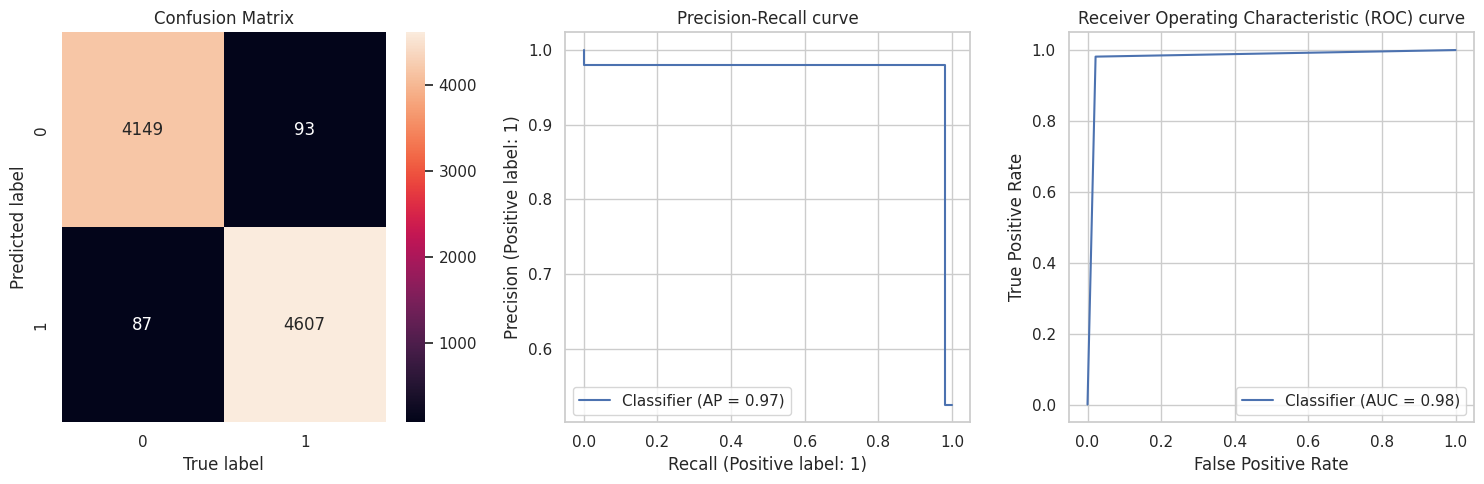

LSTM
f1-score: 98.08%
Precision: 98.02%
Recall: 98.15%
Accuracy: 97.99%


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf

# Assuming x_train and y_train are your preprocessed time-series data
# Ensure that x_train is a DataFrame or a 2D array

# Reshape x_train to have three dimensions (samples, time_steps, features)
time_steps = 1  # You may adjust this based on your data and how it should be split into time steps
features = x_train.shape[1]  # Assuming x_train has multiple features

x_train_reshaped = np.reshape(x_train.values, (x_train.shape[0], time_steps, features))
x_val_reshaped = np.reshape(x_val.values, (x_val.shape[0], time_steps, features))
x_test_reshaped = np.reshape(x_test.values, (x_test.shape[0], time_steps, features))

# Function to create an LSTM model
def create_lstm_model(learning_rate = 1e-4, time_steps=time_steps, features=features):
    model = Sequential()
    model.add(LSTM(128, input_shape=(time_steps, features)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Wrapper function for KerasClassifier
def create_keras_classifier():
    return KerasClassifier(build_fn=lambda: create_lstm_model(), verbose=0)

# Define parameter grid for GridSearchCV
param_grid = {
    'epochs': [30, 40]
}

# Define time series split
tscv = TimeSeriesSplit(n_splits=5)

# Define custom scorer
def custom_scorer(y_true, y_pred):
    # Your custom scoring logic here
    return f1_score(y_true, y_pred)

scorer = make_scorer(custom_scorer, greater_is_better=True)

# Create GridSearchCV object
grid_search = GridSearchCV(create_keras_classifier(), param_grid=param_grid, scoring=scorer, cv=tscv)

# Perform Grid Search
history = grid_search.fit(x_val_reshaped, y_val, verbose=2)

# Print best parameters
print("Best Parameters (LSTM): ", history.best_params_)

finalPrediction(grid_search.best_estimator_, "LSTM", results_table)

##LSTM ADASYN


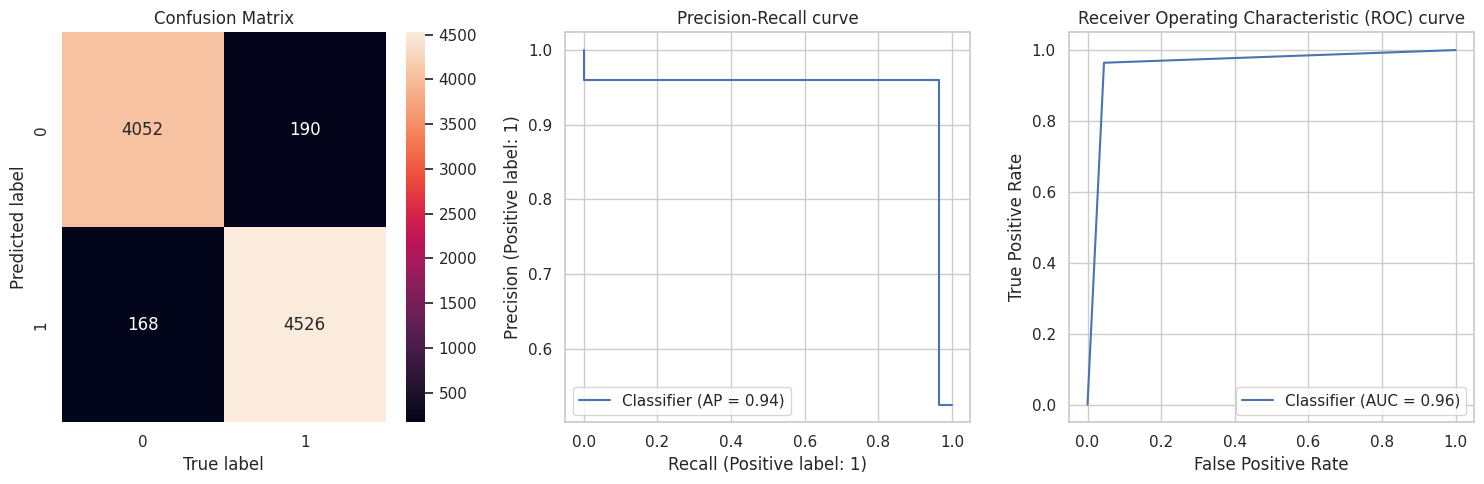

LSTM_ADASYN
f1-score: 96.20%
Precision: 95.97%
Recall: 96.42%
Accuracy: 95.99%


In [ ]:
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import FunctionTransformer

# Custom transformer for ADASYN
class ADASYNTransformer(TransformerMixin, BaseEstimator):
    def __init__(self, sampling_strategy='minority'):
        self.sampling_strategy = sampling_strategy
        self.adasyn = ADASYN(sampling_strategy=sampling_strategy)

    def fit(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            X_resampled, y_resampled = self.adasyn.fit_resample(X.values.reshape((X.shape[0], -1)), y)
        else:  # Assuming X is a NumPy array
            X_resampled, y_resampled = self.adasyn.fit_resample(X.reshape((X.shape[0], -1)), y)
        return self

    def transform(self, X, y=None):
        return X

# Function to reshape data for LSTM
def reshape_data(X, time_steps=time_steps, features=features):
    if isinstance(X, pd.DataFrame):
        X = X.values
    return X.reshape((X.shape[0], time_steps, features))

# Create pipeline
pipeline = Pipeline([
    ('adasyn', ADASYNTransformer()),
    ('reshape', FunctionTransformer(reshape_data, validate=False)),
    ('clf', create_keras_classifier())
])
param_grid = {}
# Perform Grid Search
grid_search = GridSearchCV(pipeline, param_grid=param_grid, scoring=scorer, cv=tscv)
grid_search.fit(x_val, y_val)

finalPrediction(grid_search.best_estimator_, "LSTM_ADASYN", results_table)

##RNN

Streaming output truncated to the last 5000 lines.
47/47 - 0s - loss: 0.1093 - accuracy: 0.9560 - 180ms/epoch - 4ms/step
Epoch 12/30
47/47 - 0s - loss: 0.1008 - accuracy: 0.9601 - 196ms/epoch - 4ms/step
Epoch 13/30
47/47 - 0s - loss: 0.1026 - accuracy: 0.9577 - 191ms/epoch - 4ms/step
Epoch 14/30
47/47 - 0s - loss: 0.1050 - accuracy: 0.9581 - 181ms/epoch - 4ms/step
Epoch 15/30
47/47 - 0s - loss: 0.1042 - accuracy: 0.9614 - 178ms/epoch - 4ms/step
Epoch 16/30
47/47 - 0s - loss: 0.1039 - accuracy: 0.9594 - 180ms/epoch - 4ms/step
Epoch 17/30
47/47 - 0s - loss: 0.0978 - accuracy: 0.9584 - 177ms/epoch - 4ms/step
Epoch 18/30
47/47 - 0s - loss: 0.0972 - accuracy: 0.9661 - 192ms/epoch - 4ms/step
Epoch 19/30
47/47 - 0s - loss: 0.0898 - accuracy: 0.9664 - 210ms/epoch - 4ms/step
Epoch 20/30
47/47 - 0s - loss: 0.0915 - accuracy: 0.9641 - 193ms/epoch - 4ms/step
Epoch 21/30
47/47 - 0s - loss: 0.0918 - accuracy: 0.9661 - 187ms/epoch - 4ms/step
Epoch 22/30
47/47 - 0s - loss: 0.0941 - accuracy: 0.9621 - 

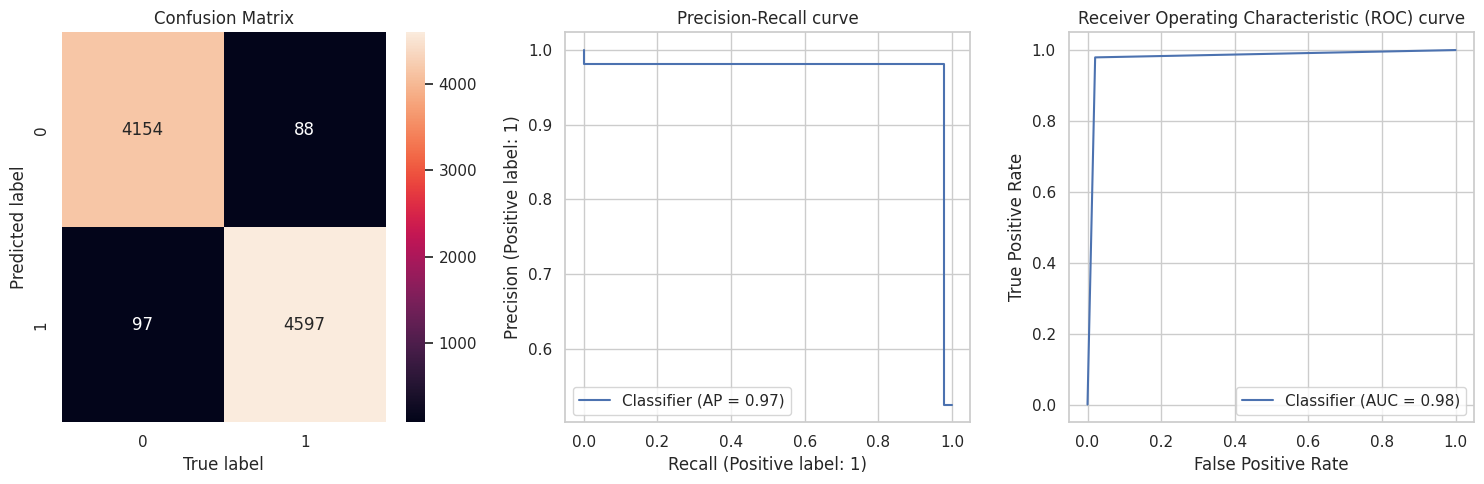

RNN
f1-score: 98.03%
Precision: 98.12%
Recall: 97.93%
Accuracy: 97.93%


In [ ]:
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.layers import Flatten

# Function to create an RNN model
def create_rnn_model(units, dropout_rate, epochs, batch_size, learning_rate):
    model = Sequential()
    model.add(SimpleRNN(units, input_shape=(time_steps, features), return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(SimpleRNN(units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(Flatten())  # Add Flatten layer to make output 2D
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Wrap the Keras model as a scikit-learn estimator
rnn_model = KerasClassifier(build_fn=create_rnn_model, verbose=0)

# Define parameter grid for GridSearchCV
param_grid = {
    'units': [100, 130],
    'dropout_rate': [0.2, 0.5],
    'epochs': [30, 40],
    'batch_size': [32, 64],
    'learning_rate': [1e-4, 1e-5]
}

# Create GridSearchCV object
grid_search_rnn = GridSearchCV(rnn_model, param_grid=param_grid, scoring=scorer, cv=tscv)

# Perform Grid Search
history = grid_search_rnn.fit(x_val_reshaped, y_val, verbose=2)

# Print best parameters
print("Best Parameters (RNN): ", history.best_params_)

# Assuming you have the finalPrediction function defined, you can use it as follows:
finalPrediction(history.best_estimator_, "RNN", results_table)

## RNN ADASYN

Best Parameters (RNN_ADASYN):  {'rnn__batch_size': 64, 'rnn__dropout_rate': 0.2, 'rnn__epochs': 40, 'rnn__learning_rate': 0.0001, 'rnn__units': 130}


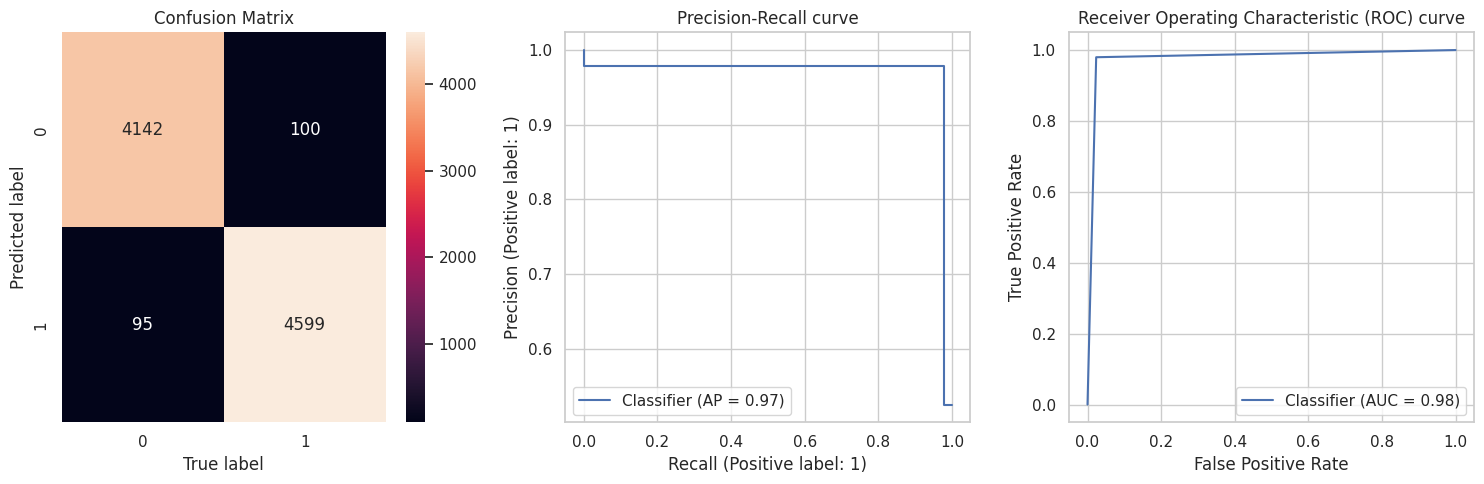

RNN_ADASYN
f1-score: 97.92%
Precision: 97.87%
Recall: 97.98%
Accuracy: 97.82%


In [ ]:
# Create pipeline

param_grid = {
   'rnn__units': [100, 130],
    'rnn__dropout_rate': [0.2, 0.5],
    'rnn__epochs': [30, 40],
    'rnn__batch_size': [32, 64],
    'rnn__learning_rate': [1e-4, 1e-5]
}

pipeline = Pipeline([
    ('adasyn', ADASYNTransformer()),
    ('reshape', FunctionTransformer(reshape_data, validate=False)),
    ('rnn', KerasClassifier(build_fn=create_rnn_model, verbose=0))
])

# Perform Grid Search
grid_search_rnn_ada = GridSearchCV(pipeline, param_grid=param_grid, scoring=scorer, cv=tscv)
history = grid_search_rnn_ada.fit(x_val_reshaped, y_val)

# Print best parameters
print("Best Parameters (RNN_ADASYN): ", history.best_params_)

# Assuming you have the finalPrediction function defined, you can use it as follows:
finalPrediction(history.best_estimator_, "RNN_ADASYN", results_table)

In [ ]:
# Tabulate and display and format the classifier results
results_table = pd.DataFrame(results_table,
                               columns = ["Classifier","F1-score","Precision","Recall","Accuracy"])

# Sort and style the DataFrame
full_results_sorted = results_table.sort_values(by='F1-score', ascending=False)
# Reset the index after sorting
full_results_sorted = full_results_sorted.reset_index(drop=True)
full_results_styled = full_results_sorted.style.background_gradient(cmap='Blues')

full_results_styled.set_properties(**{'text-align': 'center'}).hide_index()

# Display the styled and sorted DataFrame
full_results_styled

Classifier,F1-score,Precision,Recall,Accuracy
LSTM,98.083883,98.021277,98.146570,97.985676
RNN,98.027508,98.121665,97.933532,97.929722
RNN_ADASYN,97.923986,97.871888,97.976140,97.817816
Random Forest Classifier with hyperparameter tuning,96.745468,96.286136,97.209203,96.564458
Random Forest Classifier with ADASYN and hyperparameter tuning,96.650005,96.496071,96.804431,96.474933
LSTM_ADASYN,96.195537,95.971162,96.420963,95.993733
